In [1]:
import sys
sys.path.append('/home/fs72053/yamuna_k/modular_deep_learning')
sys.path.append('../src/cifar100')
sys.path.append('../src')

In [2]:
from cifar100_original_moe_training import *
from original_moe_training import *

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-l_qd7bo1 because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


Files already downloaded and verified
Files already downloaded and verified
device cuda:0


In [3]:
from helper.collect_results import *

device cuda:0


In [4]:
working_path = '/gpfs/data/fs72053/yamuna_k'

In [5]:
# Paths to where the trained models and figures will be stored. You can change this as you see fit.
fig_path = os.path.join(working_path, 'figures/cifar100')
model_path = os.path.join(working_path, 'models/cifar100')
pre_trained_model_path = os.path.join(working_path, 'models/pre_trained/cifar100')
results_path = os.path.join(working_path, 'results/cifar100')

if not os.path.exists(fig_path):
    os.mkdir(fig_path)
if not os.path.exists(model_path):
    os.mkdir(model_path)
if not os.path.exists(results_path):
    os.mkdir(results_path)    

In [6]:
#Function to display the images
def plot_colour_images(images_to_plot, titles=None, nrows=None, ncols=6, thefigsize=(18,18)):
    # images_to_plot: list of images to be displayed
    # titles: list of titles corresponding to the images
    # ncols: The number of images per row to display. The number of rows 
    #        is computed from the number of images to display and the ncols
    # theFigsize: The size of the layour of all the displayed images
    
    n_images = images_to_plot.shape[0]
    
    # Compute the number of rows
    if nrows is None:
        nrows = np.ceil(n_images/ncols).astype(int)
    
    fig,ax = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=thefigsize)
    ax = ax.flatten()
    
    for i in range(n_images):
        img = images_to_plot[i,:,:,:]
        npimg = np.clip(img.numpy(),0,1)
        ax[i].imshow(npimg)
        ax[i].axis('off')  
        if titles is not None and i<10:
            ax[i].set_title(titles[i%10])

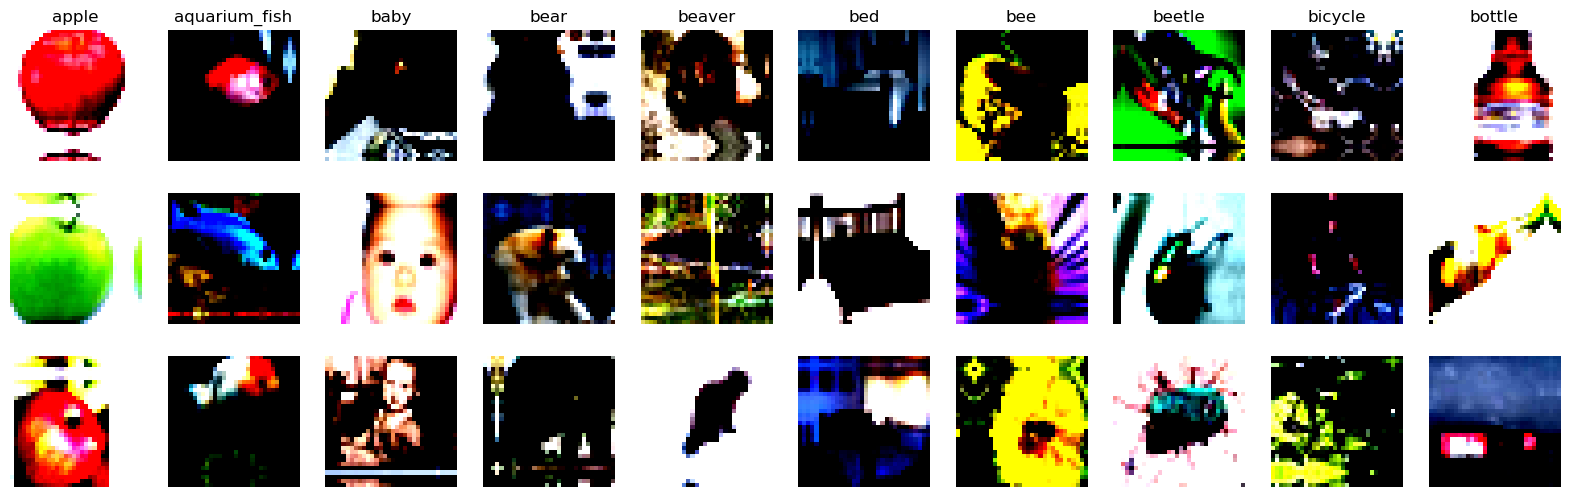

In [8]:
# get some random training images
dataiter = iter(cifar100_trainloader)
images, labels = dataiter.next()

images_to_plot = []
count = 0
selected_labels = []
for i in range(100):
    if count == 10:
        break
    index = np.where(labels==i)[0]
    if len(index) >= 3:
        selected_labels.append(i)
        images_to_plot.append(images[index[0:3],:,:])
        count += 1
    
selected_labels = [classes_cifar100[i] for i in selected_labels]
images_to_plot = torch.transpose(torch.stack(images_to_plot),0,1)
new_shape = images_to_plot.shape
images_to_plot = images_to_plot.reshape(new_shape[0]*new_shape[1], new_shape[2], new_shape[3], new_shape[4])
images_to_plot = images_to_plot.permute(0,2,3,1)
plot_colour_images(images_to_plot, nrows=3, ncols=10,thefigsize=(20,6), titles=selected_labels)

In [7]:
filename = 'cifar100_top_k_results.csv'

In [8]:
total_experts = 20
num_classes = 100
num_epochs = 200

In [10]:
m = 'cifar100_single_model'
collect_single_result(m, num_classes, num_epochs, testloader=cifar100_testloader, top_5=True,
                      model_path=model_path, results_path=results_path, filename=filename)

In [ ]:
m = 'cifar100_rand_init_top_1'
collect_results(m, 'moe_top_k_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar100_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [11]:
m = 'cifar100_rand_init_top_2'
collect_results(m, 'moe_top_k_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar100_testloader, top_5=True, model_path=model_path, results_path=results_path, filename=filename)

cifar100_rand_init_top_2_100_20_models.pt
10


In [ ]:
m = 'cifar100_rand_init'
collect_results(m, 'moe_expectation_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar100_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [12]:
m = 'cifar100_stochastic_rand_init'
collect_results(m, 'moe_stochastic_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar100_testloader, top_5=True, model_path=model_path, results_path=results_path, filename=filename)

cifar100_stochastic_rand_init_100_20_models.pt
10


In [ ]:
m = 'cifar100_with_attn_rand_init_top_1'
collect_results(m, 'moe_top_k_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar100_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [9]:
m = 'cifar100_with_attn_rand_init_top_2'
collect_results(m, 'moe_top_k_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar100_testloader, top_5=True, model_path=model_path, results_path=results_path, filename=filename)

cifar100_with_attn_rand_init_top_2_100_20_models.pt
10


RuntimeError: CUDA out of memory. Tried to allocate 64.00 MiB (GPU 0; 39.59 GiB total capacity; 37.16 GiB already allocated; 64.12 MiB free; 37.80 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
m = 'cifar100_with_attn_rand_init'
collect_results(m, 'moe_expectation_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar100_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [ ]:
m = 'cifar100_with_attn_stochastic_rand_init'
collect_results(m, 'moe_stochastic_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar100_testloader, top_5=True, model_path=model_path, results_path=results_path, filename=filename)

In [16]:
m = 'cifar10_rand_init'
w_importance_range = [i * 0.2 for i in range(1, 6)]
collect_results(m, 'moe_expectation_model', w_importance_range=w_importance_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [17]:
m = 'cifar10_rand_init_top_2'
w_importance_range = [i * 0.2 for i in range(1, 6)]
collect_results(m, 'moe_top_k_model', w_importance_range=w_importance_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [18]:
m = 'cifar10_with_attn_rand_init'
w_importance_range = [i * 0.2 for i in range(1, 6)]
collect_results(m, 'moe_expectation_model', w_importance_range=w_importance_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [19]:
m = 'cifar10_with_attn_rand_init_top_2'
w_importance_range = [i * 0.2 for i in range(1, 6)]
collect_results(m, 'moe_top_k_model', w_importance_range=w_importance_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [13]:
m = 'cifar100_loss_gate_rand_init'
collect_loss_gate_results(m, 'moe_expert_loss_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar100_testloader, top_5=True, model_path=model_path, results_path=results_path, filename=filename)

In [24]:
m = 'new_cifar10_with_attention_rand_init'
collect_results(m, 'moe_expectation_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [14]:
m = 'new_cifar100_with_attn_stochastic_rand_init'
collect_results(m, 'moe_stochastic_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar100_testloader,top_5=True, model_path=model_path, results_path=results_path, filename=filename)

new_cifar100_with_attn_stochastic_rand_init_100_20_models.pt


FileNotFoundError: [Errno 2] No such file or directory: '/gpfs/data/fs72053/yamuna_k/models/cifar100/new_cifar100_with_attn_stochastic_rand_init_100_20_models.pt'

In [27]:
m = 'new_cifar10_with_attn_rand_init'
w_importance_range = [i * 0.2 for i in range(1, 6)]
collect_results(m, 'moe_expectation_model', w_importance_range=w_importance_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [28]:
m = 'new_cifar10_with_attn_rand_init_top_2'
w_importance_range = [i * 0.2 for i in range(1, 6)]
collect_results(m, 'moe_top_k_model', w_importance_range=w_importance_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [ ]:
m = 'cifar10_no_gate_entropy_argmax_no_gate_T_10.0'
collect_results(m, 'moe_no_gate_entropy_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, top_5=True,model_path=model_path, results_path=results_path, filename=filename)

In [30]:
m = 'new_cifar10_no_gate_self_information'
collect_results(m, 'moe_expectation_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [15]:
m = 'new_cifar100_no_gate_self_information_stochastic'
collect_results(m, 'moe_stochastic_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar100_testloader,top_5=True, model_path=model_path, results_path=results_path, filename=filename)

new_cifar100_no_gate_self_information_stochastic_100_20_models.pt
10


In [16]:
m = 'new_cifar100_no_gate_self_information_top_1'
collect_results(m, 'moe_top_1_model', k=1, total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar100_testloader,top_5=True, model_path=model_path, results_path=results_path, filename=filename)

new_cifar100_no_gate_self_information_top_1_100_20_models.pt
10


In [10]:
m = 'new_cifar10_no_gate_self_information_top_2'
collect_results(m, 'moe_top_k_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader,top_5=True, model_path=model_path, results_path=results_path, filename=filename)

In [17]:
import pandas as pd
filename = os.path.join(results_path, 'cifar100_top_k_results.csv')
data = pd.read_csv(filename)

In [18]:
final_results_filename = os.path.join(results_path,'cifar100_top_k_final_results.csv')

In [36]:
models = ['cifar10_rand_init_10', 'cifar10_with_attention_rand_init',
          'cifar10_rand_init_top_1', 'cifar10_with_attention_rand_init_top_1',
          'cifar10_rand_init_top_2', 'cifar10_with_attention_rand_init_top_2',
          'cifar10_rand_init_importance', 'cifar10_with_attn_rand_init_importance',
          'cifar10_rand_init_top_2_importance', 'cifar10_with_attn_rand_init_top_2_importance',
          'new_cifar10_with_attn_rand_init_importance', 'new_cifar10_with_attn_rand_init_top_2_importance',
          'cifar10_loss_gate_rand_init',
          ]
header = True
df = None
std = ['{:.3f}'.format(std_val) for std_val in data.groupby('filename')['test error'].std().values]
data = data.groupby('filename').mean().reset_index()
for i, m in enumerate(models):
    model_data = data[data['filename'].str.startswith(m)]
    if model_data.empty:
        continue
    if i:
        header = False
    index = model_data.index.values[0]
    series = model_data.mean(numeric_only=True)
    row = pd.DataFrame([series.values], columns=series.index)
    row['train error'] = (1-row['train error'])*100
    row['test error'] = (1-row['test error'])*100
    row.insert(2, 'test error std', std[index])
    row.insert(0, 'filename' , model_data['filename'].iloc[0])
    if df is None:
        df = row
    else:
        df = pd.concat([df, row])
header = ['filename', 'train error', 'test error', 'test error std', 'mutual information', 'sample entropy', 'experts usage']
    
df.to_csv(final_results_filename,mode='a',header=header, index=False, float_format='%.3f')


In [19]:
models = ['cifar100_single_model',
           'cifar100_rand_init_10', 'cifar100_with_attention_rand_init_10',
          'cifar100_stochastic_rand_init', 'cifar100_with_attn_stochastic_rand_init', 
          'cifar100_rand_init_top_1_10', 'cifar100_with_attn_rand_init_top_1_10',
          'cifar100_rand_init_top_2_10', 'cifar100_with_attn_rand_init_top_2_10',
          'cifar100_rand_init_importance', 'cifar100_with_attn_rand_init_importance',
          'cifar100_rand_init_top_2_importance', 'cifar100_with_attn_rand_init_top_2_importance',
          'cifar100_no_gate_entropy_argmax_no_gate_T_10', 
          'new_cifar100_no_gate_self_information_10', 'new_cifar100_no_gate_self_information_stochastic',
          'new_cifar100_no_gate_self_information_top_1', 'new_cifar100_no_gate_self_information_top_2',
           'cifar100_loss_gate_rand_init',
          'new_cifar100_with_attention_rand_init_top_1', 'new_cifar100_with_attention_rand_init_top_2',
          'new_cifar100_with_attn_stochastic_rand_init',
          'new_cifar100_with_attn_rand_init_importance', 'new_cifar100_with_attn_rand_init_top_2_importance',
          ]

header = True
for i, m in enumerate(models):
    if i:
        header = False
    # select model with the minimum train error

    model_data = data[data['filename'].str.startswith(m)]
    if model_data.empty:
        continue
    else:   
        row = model_data.loc[[model_data['val error'].idxmin()]]
        row['val error'] = (1-row['val error'])*100
        row['top-1 error'] = (1-row['top-1 error'])*100   
        row['top-5 error'] = (1-row['top-5 error'])*100   
    
    # compute the std of test error over the 10 runs
    std = '{:.3f}'.format(data[data['filename'].str.startswith(m)]['top-1 error'].std())
    row['val error std'] = std
    row.to_csv(final_results_filename, mode='a', header=header, index=False, float_format='%.3f')

In [23]:
models = ['cifar10_rand_init_10', 'cifar10_with_attention_rand_init_10',
          'cifar10_rand_init_top_1_10', 'cifar10_with_attention_rand_init_top_1_10',
          'cifar10_rand_init_top_2_10', 'cifar10_with_attention_rand_init_top_2_10',
          'cifar10_rand_init_importance', 'cifar10_with_attn_rand_init_importance',
          'cifar10_rand_init_top_2_importance', 'cifar10_with_attn_rand_init_top_2_importance',
          'cifar10_no_gate_entropy_argmax_no_gate_T_10', 'new_cifar10_no_gate_self_information_10',
          'new_cifar10_no_gate_self_information_top_1', 'new_cifar10_no_gate_self_information_top_2',
           'cifar10_loss_gate_rand_init',
          'new_cifar10_with_attention_rand_init_top_1', 'new_cifar10_with_attention_rand_init_top_2',
          'new_cifar10_with_attn_stochastic_rand_init',
          'new_cifar10_with_attn_rand_init_importance', 'new_cifar10_with_attn_rand_init_top_2_importance',
          ]

header = True
# df = None
std = ['{:.3f}'.format(std_val) for std_val in data.groupby('filename')['test error'].std().values]
data = data.groupby('filename').mean().reset_index()
# print('data', data)
for i, m in enumerate(models):
    model_data = data[data['filename'].str.startswith(m)]
    if model_data.empty:
        continue
    if i:
        header = False
    index = model_data.index.values[0]
    row = pd.DataFrame(model_data.values, columns=model_data.columns)
    row = model_data.loc[[model_data['val error'].idxmin()]]
    row['val error'] = (1-row['val error'])*100
    row['test error'] = (1-row['test error'])*100   
    row.insert(3, 'test error std', std[index])
    row.to_csv(final_results_filename, mode='a', header=header, index=False, float_format='%.3f')

In [ ]:
models = ['cifar10_rand_init_10', 'cifar10_with_attention_rand_init_10',
          'cifar10_rand_init_top_1_10', 'cifar10_with_attention_rand_init_top_1_10',
          'cifar10_rand_init_top_2_10', 'cifar10_with_attention_rand_init_top_2_10',
          'cifar10_rand_init_importance', 'cifar10_with_attn_rand_init_importance',
          'cifar10_rand_init_top_2_importance', 'cifar10_with_attn_rand_init_top_2_importance',
          'cifar10_no_gate_entropy_argmax_no_gate_T_10', 'new_cifar10_no_gate_self_information_10',
          'new_cifar10_no_gate_self_information_top_1', 'new_cifar10_no_gate_self_information_top_2',
           'cifar10_loss_gate_rand_init',
          'new_cifar10_with_attention_rand_init_top_1', 'new_cifar10_with_attention_rand_init_top_2',
          'new_cifar10_with_attn_stochastic_rand_init',
          'new_cifar10_with_attn_rand_init_importance', 'new_cifar10_with_attn_rand_init_top_2_importance',
          ]

header = True
for i, m in enumerate(models):
    if i:
        header = False
    # select model with the minimum train error
    model_data = data[data['filename'].str.startswith(m)]
    if model_data.empty:
        continue
    else:   
        best_model = model_data.loc[[model_data['val error'].idxmin()]]['filename'].values[0]
        
        model_data = model_data.loc[data['filename'] == best_model]
        print(model_data)
        
        series = model_data.mean(numeric_only=True)
        row = pd.DataFrame([series.values], columns=series.index)
        row.insert(0, 'filename', best_model)
        row['val error'] = (1-row['val error'])*100
        row['test error'] = (1-row['test error'])*100   
    
    # compute the std of test error over the 10 runs
    std = '{:.3f}'.format(data[data['filename'].str.startswith(m)]['test error'].std())
    row['val error std'] = std
    row.to_csv(final_results_filename, mode='a', header=header, index=False, float_format='%.3f')

In [20]:
data = pd.read_csv(final_results_filename)
data.fillna('NA', inplace=True)
data

filename  val error  top-1 error  \
0                cifar100_single_model_100_models.pt     48.551       50.312   
1     cifar100_stochastic_rand_init_100_20_models.pt     47.614       49.349   
2          cifar100_rand_init_top_2_100_20_models.pt     47.663       49.567   
3  new_cifar100_no_gate_self_information_stochast...     49.047       51.826   
4  new_cifar100_no_gate_self_information_top_1_10...     48.589       51.621   
5      cifar100_loss_gate_rand_init_100_20_models.pt     51.871       54.513   

   top-5 error mutual information sample entropy experts usage  \
0       78.183                 NA             NA            NA   
1       77.011              0.327            0.0         0.785   
2       77.352              0.265          0.044         0.442   
3       57.771              4.154            0.0         4.165   
4       57.638              4.139          0.498         4.155   
5       82.843                0.0            0.0           0.0   

  per_task_entropy  val error std  
0               NA          0.005  
1            0.506          0.010  
2            0.271          0.005  
3            2.302          0.007  
4            2.412          0.006  
5              0.0          0.022

Train Accuracy 0.000
Max Validation Accuracy 1.000
Min Validation Error 0.000
Mutual Information 3.322
Sample Entropy 0.000
Expert Usage 3.322


Text(0.5, 1.0, 'Validation accuracy of the MoE model during Step 1 training\nwith peeking expert method for MNIST dataset with $10$ experts')

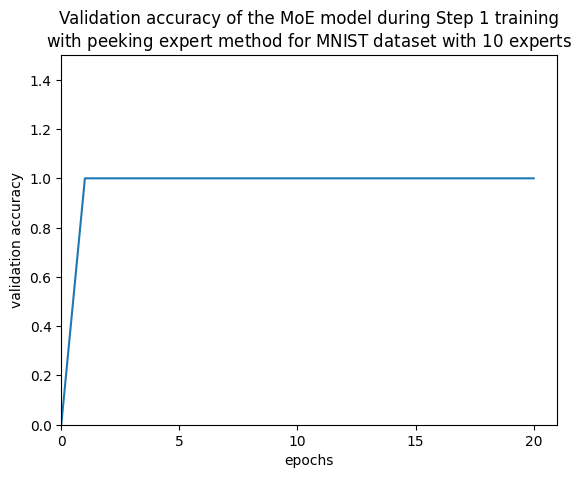

In [10]:
m = 'cifar10_no_gate_self_information'

total_experts = 10
classes = range(num_classes)
num_epochs = 20
temps = [[1.0]*num_epochs]
test_loader = cifar10_testloader

w_importance_range = [0.0]

model, model_file, best_model_index = find_best_model(m, temps=temps, 
                                                      w_importance_range=w_importance_range,
                                                      num_classes=num_classes, total_experts=total_experts, 
                                                      num_epochs=num_epochs, model_path=model_path, device=device)
# print(model['moe_no_gate_self_information_model'])
val_accuracy = torch.tensor([torch.zeros(1)]+model['moe_no_gate_self_information_model']['experts'][total_experts]['history']['val_accuracy']).cpu()
sns.lineplot(x=range(num_epochs+1), y=val_accuracy)
plt.ylabel('validation accuracy')
plt.xlabel('epochs')
plt.xlim([0, num_epochs+1])
plt.ylim([0, max(val_accuracy)+0.5])
plt.xticks(range(0,num_epochs+1,5))
plt.title('Validation accuracy of the MoE model during Step 1 training\nwith peeking expert method for CIFAR-10 dataset with $10$ experts')

Train Accuracy 0.086
Max Validation Accuracy 0.476
Min Validation Error 0.524
Mutual Information 0.260
Sample Entropy 0.019
Expert Usage 0.729
Best model index 1
cifar100_stochastic_rand_init_100_20_models.pt


<Figure size 640x480 with 0 Axes>

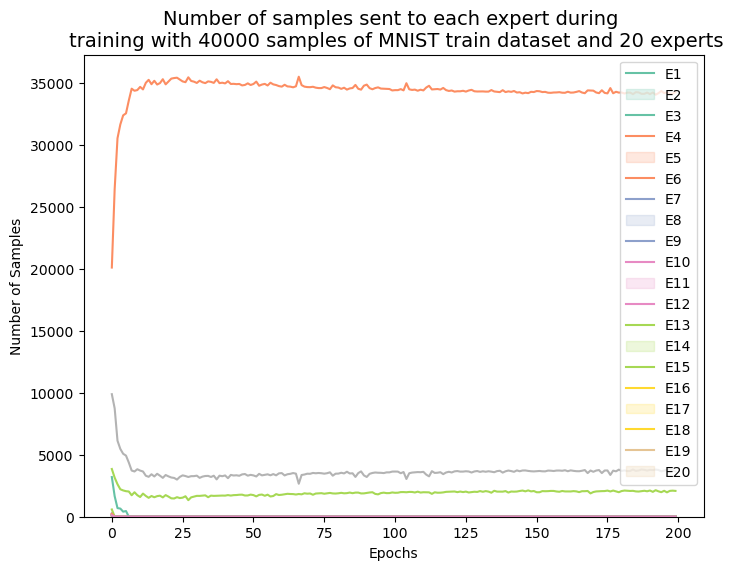

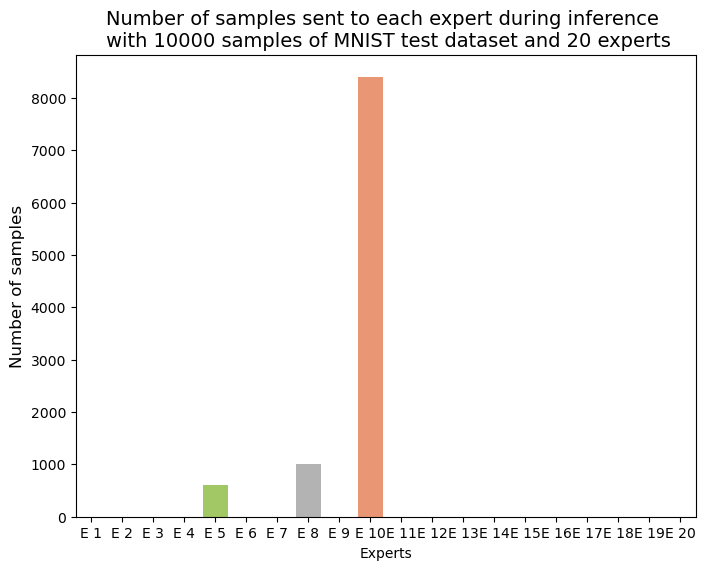

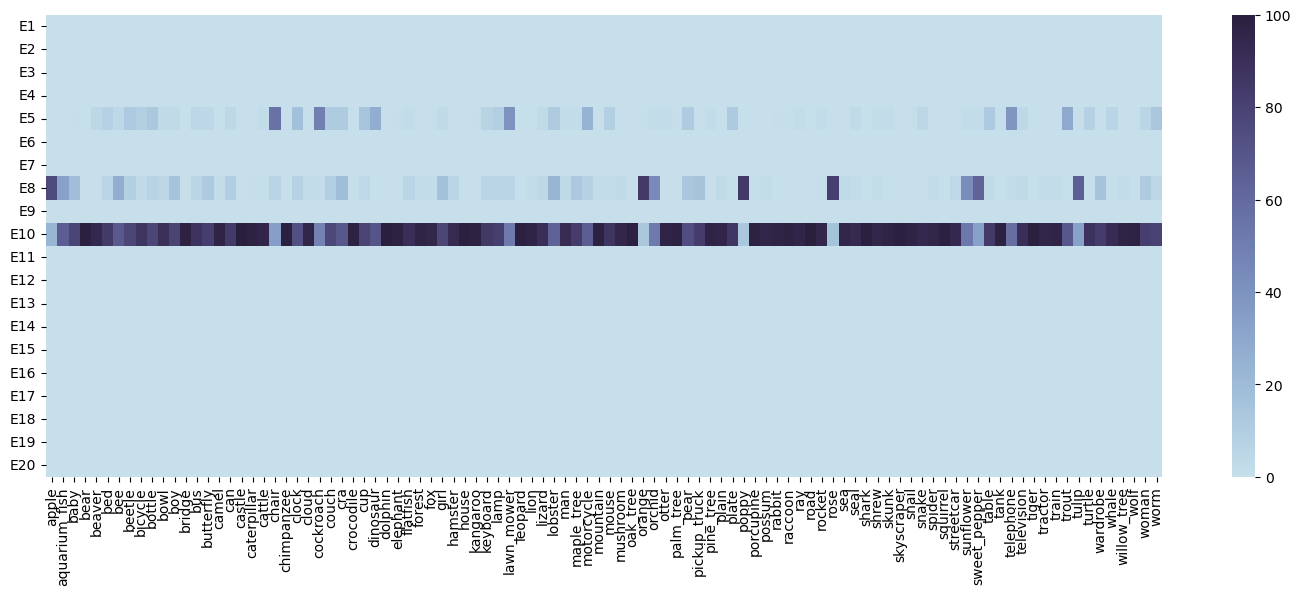

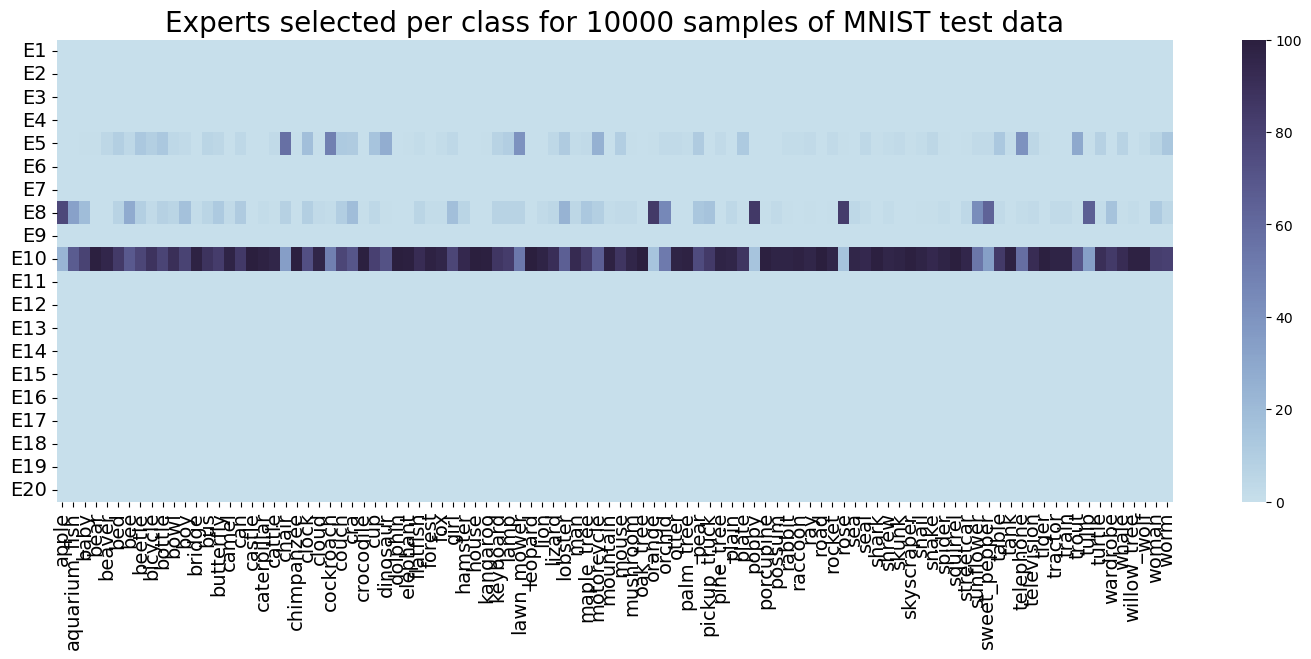

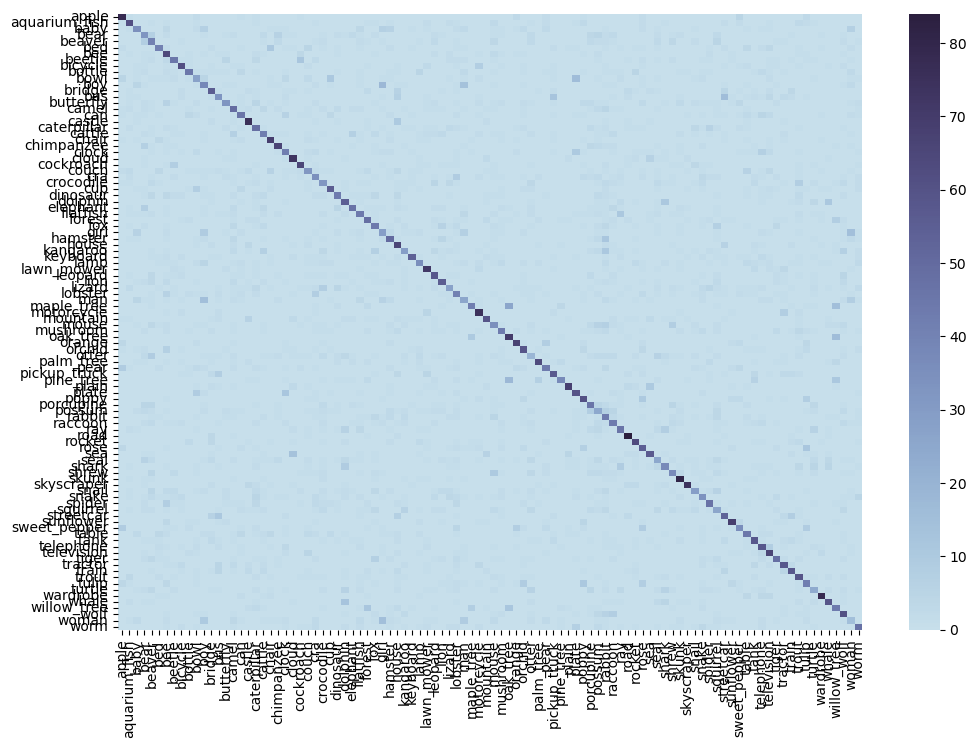

In [11]:
m = 'cifar100_stochastic_rand_init'

total_experts = 20
num_classes = 100
classes = classes_cifar100
num_epochs = 200

w_importance_range = [0.0]                           

test_loader = cifar100_testloader
plot_expert_usage(m, 'moe_expert_loss_model', test_loader=test_loader, w_importance_range=w_importance_range,
                  total_experts=total_experts,num_classes=num_classes,
                 classes=classes, num_epochs=num_epochs, annot=False,
                  fig_path=fig_path, model_path=model_path, device=device)

Train Accuracy 0.137
Max Validation Accuracy 0.490
Min Validation Error 0.510
Mutual Information 4.199
Sample Entropy 0.173
Expert Usage 4.212
Best model index 5
new_cifar100_no_gate_self_information_stochastic_100_20_models.pt


<Figure size 640x480 with 0 Axes>

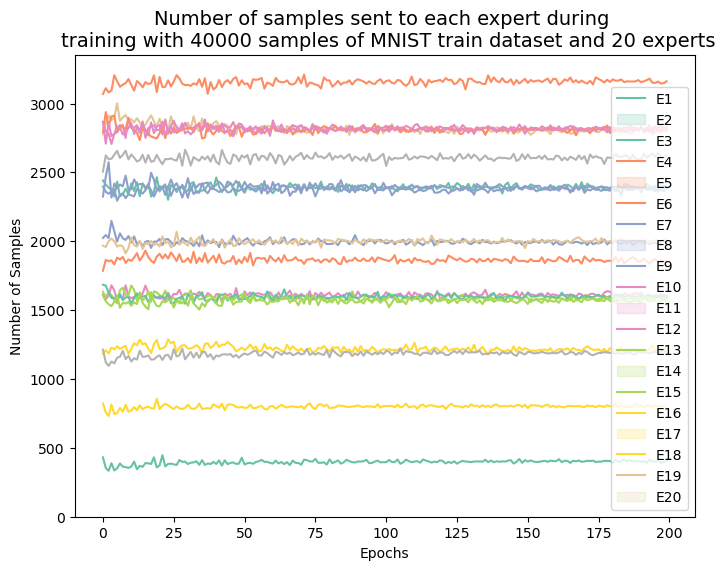

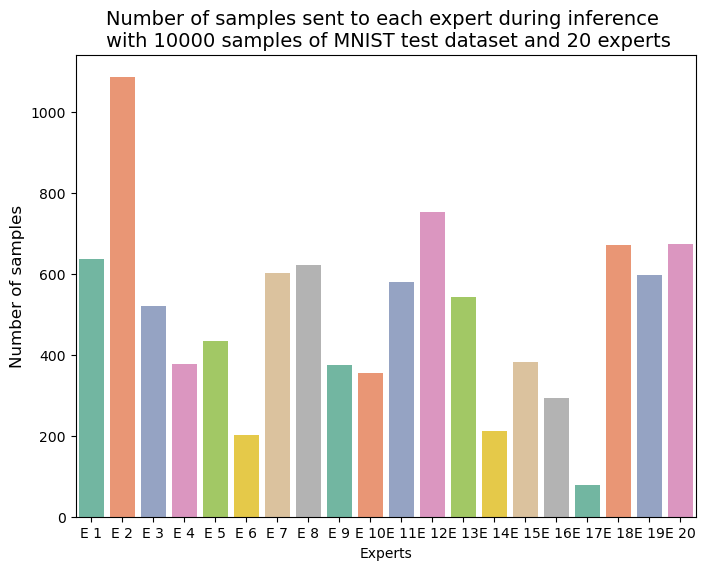

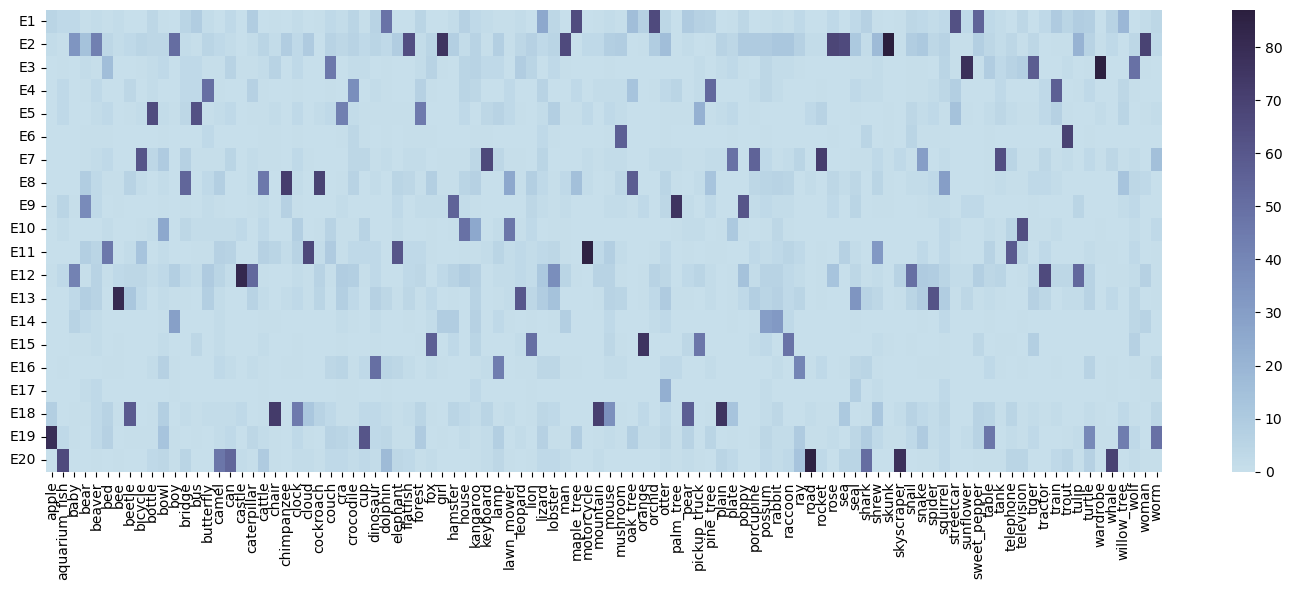

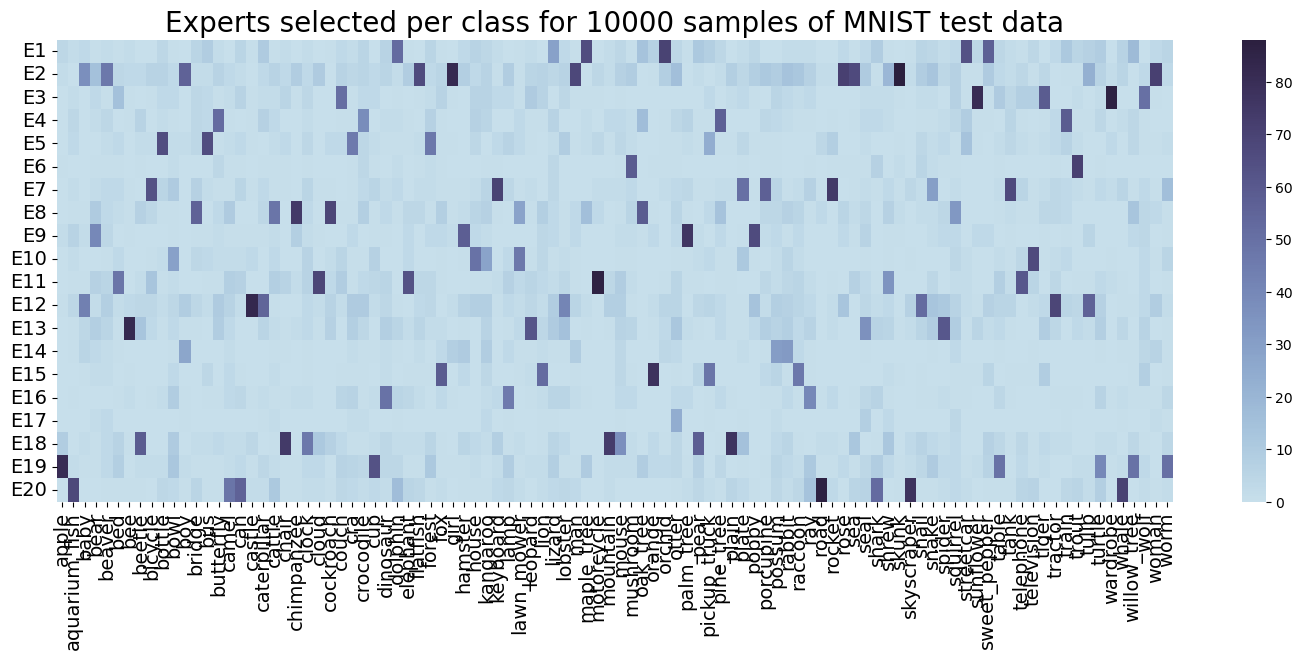

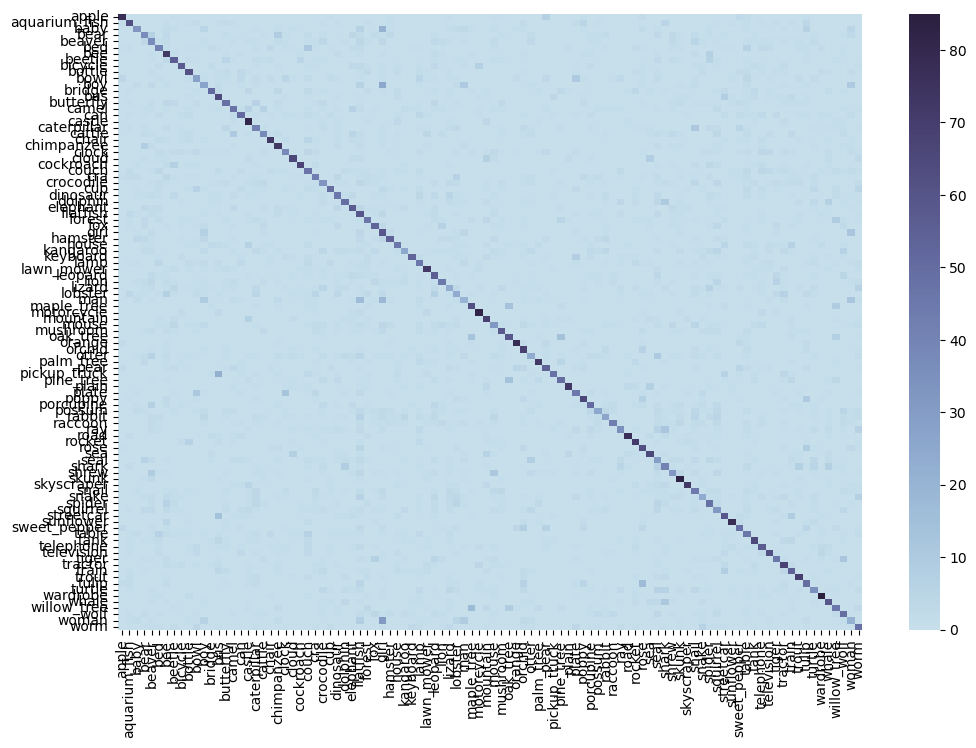

In [27]:
m = 'new_cifar100_no_gate_self_information_stochastic'

total_experts = 20
num_classes = 100
classes = classes_cifar100
num_epochs = 200

w_importance_range = [0.0]                           

test_loader = cifar100_testloader
plot_expert_usage(m, 'moe_stochastic_model', test_loader=test_loader, w_importance_range=w_importance_range,
                  total_experts=total_experts,num_classes=num_classes,
                 classes=classes, num_epochs=num_epochs, annot=False,
                  fig_path=fig_path, model_path=model_path, device=device)

Train Accuracy 0.033
Max Validation Accuracy 0.483
Min Validation Error 0.517
Mutual Information 0.000
Sample Entropy 0.000
Expert Usage 0.000
Best model index 3
cifar100_rand_init_top_2_100_20_models.pt


<Figure size 640x480 with 0 Axes>

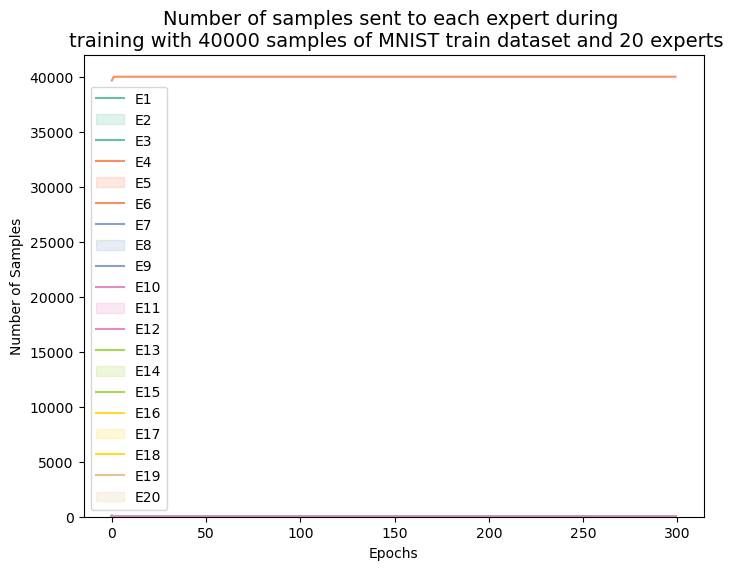

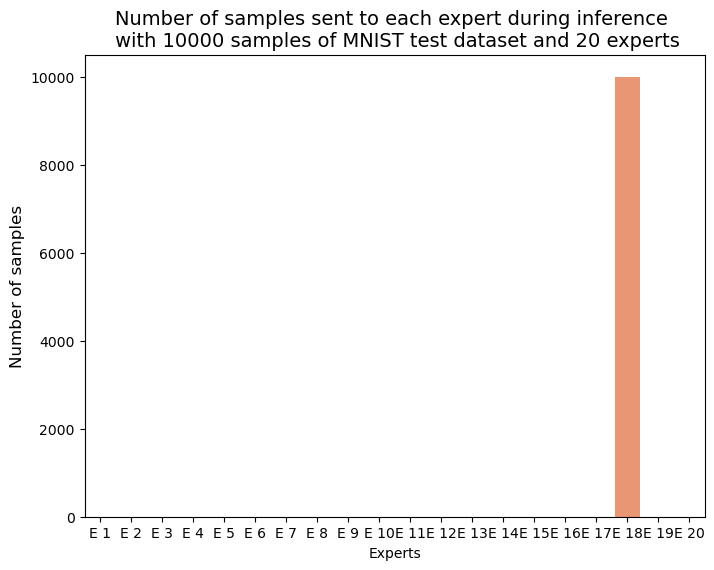

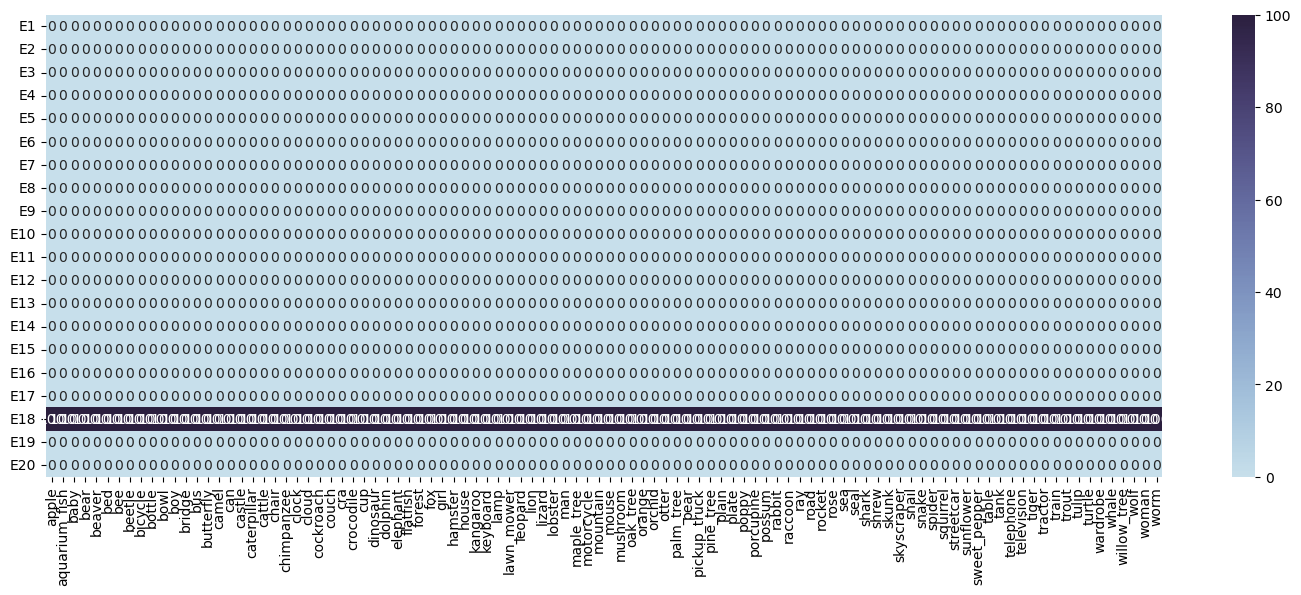

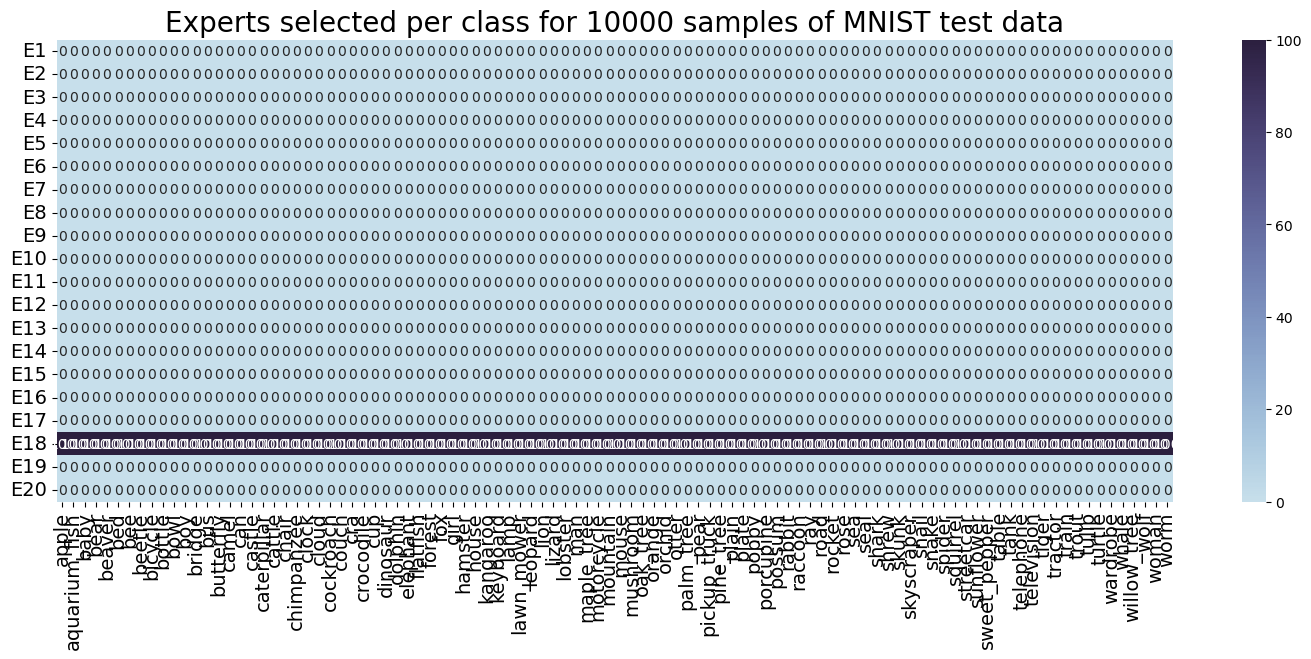

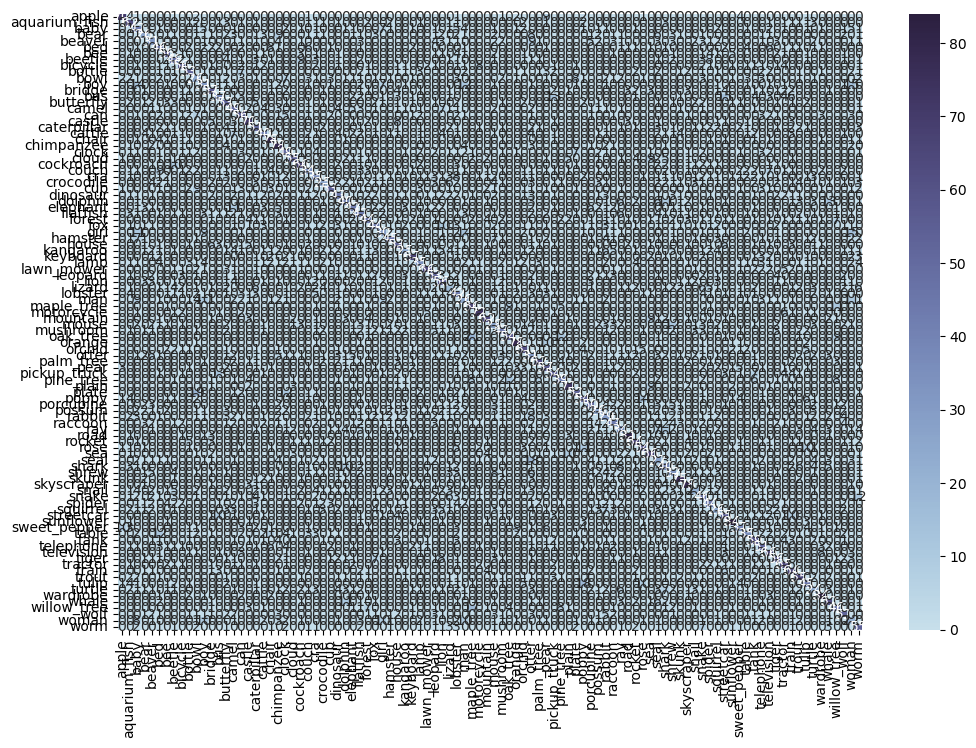

In [22]:
m = 'cifar100_rand_init_top_2'
total_experts = 20
num_classes = 100
classes = classes_cifar100
num_epochs = 300

w_importance_range = [0.0]                           

test_loader = cifar100_testloader
plot_expert_usage(m, 'moe_top_k_model', test_loader=test_loader, w_importance_range=w_importance_range,
                  total_experts=total_experts,num_classes=num_classes,
                 classes=classes, num_epochs=num_epochs, fig_path=fig_path, model_path=model_path, device=device)

Train Accuracy 0.263
Max Validation Accuracy 0.708
Min Validation Error 0.292
Mutual Information 0.597
Sample Entropy 2.866
Expert Usage 2.734
Best model index 7
cifar10_no_gate_entropy_argmax_no_gate_T_10.0_10_10_models.pt


<Figure size 640x480 with 0 Axes>

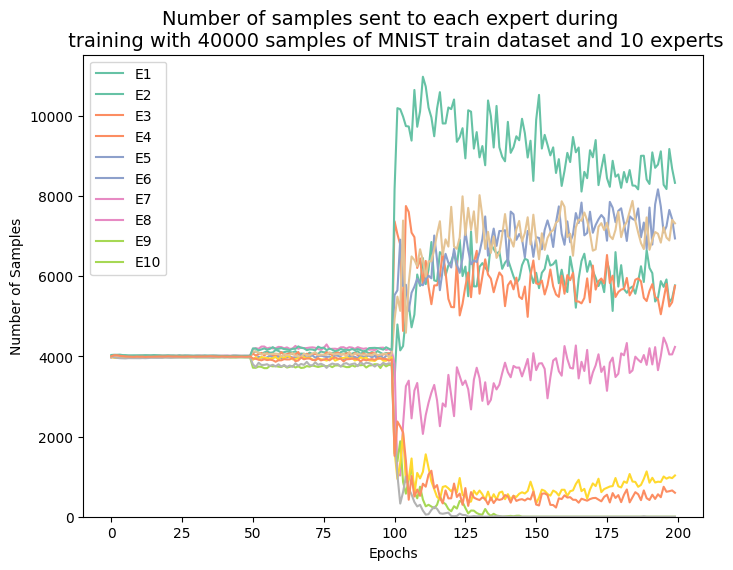

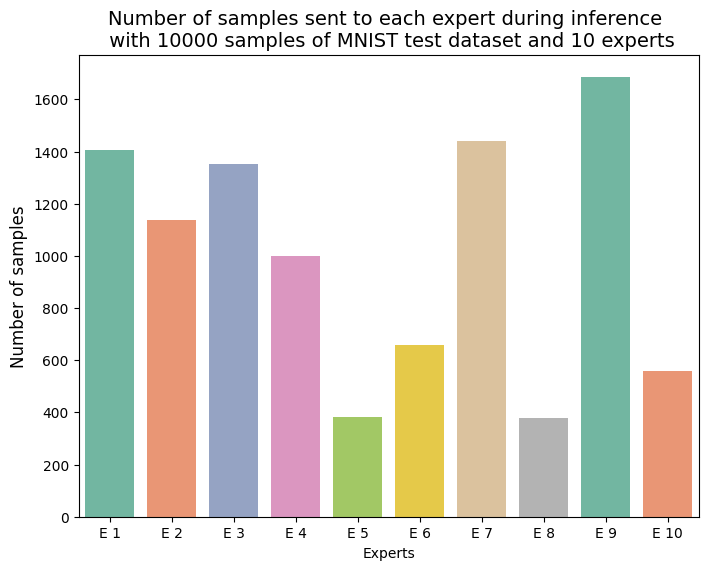

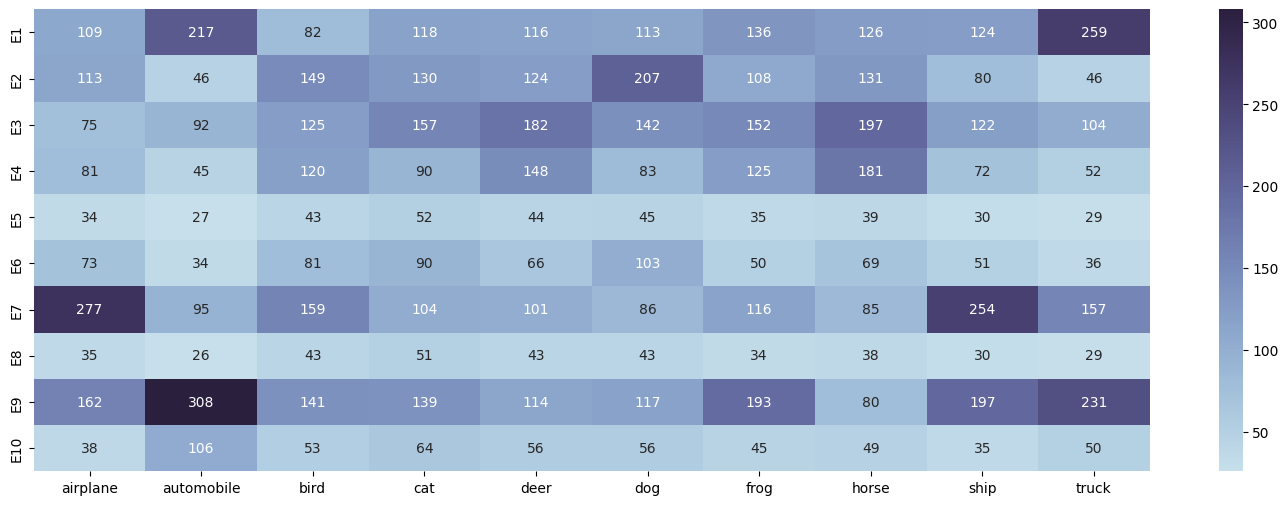

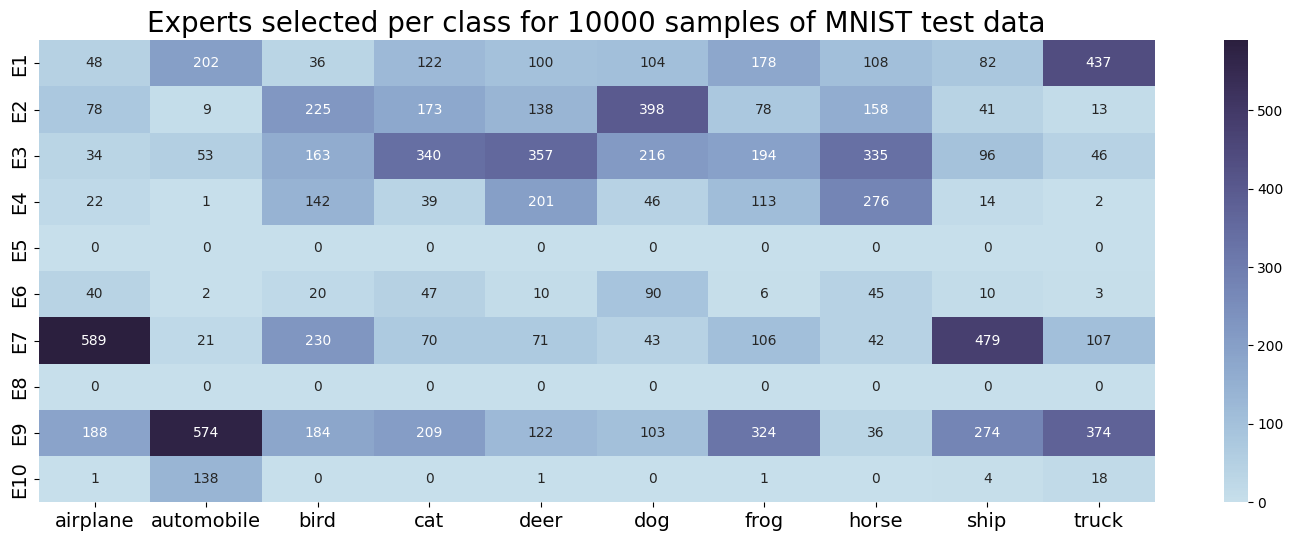

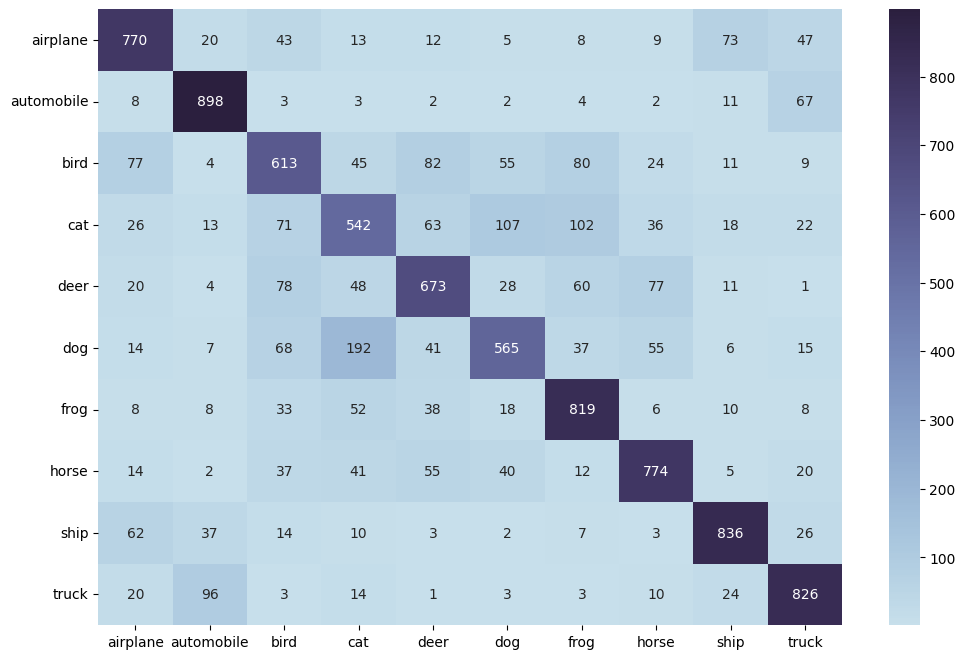

In [10]:
m = 'cifar10_no_gate_entropy_argmax_no_gate_T_10.0'
total_experts = 10
num_classes = 10
classes = classes_cifar10
num_epochs = 200

w_importance_range = [0.0]                           

test_loader = cifar10_testloader

plot_expert_usage(m, 'moe_no_gate_self_information_model', test_loader, w_importance_range=w_importance_range,
                  total_experts=total_experts,num_classes=num_classes,
                 classes=classes, num_epochs=num_epochs, fig_path=fig_path, model_path=model_path, device=device)

cifar10_without_reg_conv_4_10_10_models.pt
Min Training Error 0.277
Mutual Information 1.361
Sample Entropy 0.086
Expert Usage 1.383
cifar10_without_reg_conv_4_10_10_models.pt


<Figure size 640x480 with 0 Axes>

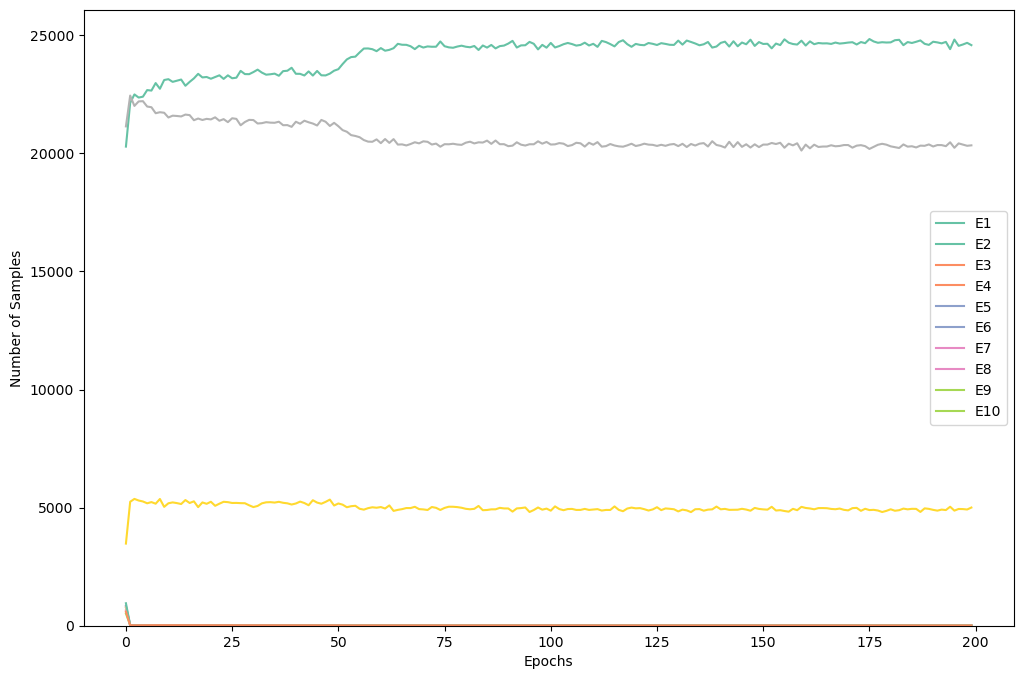

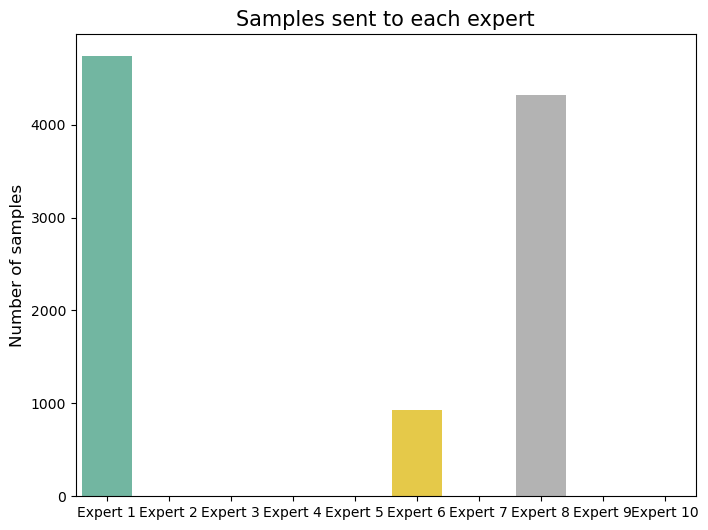

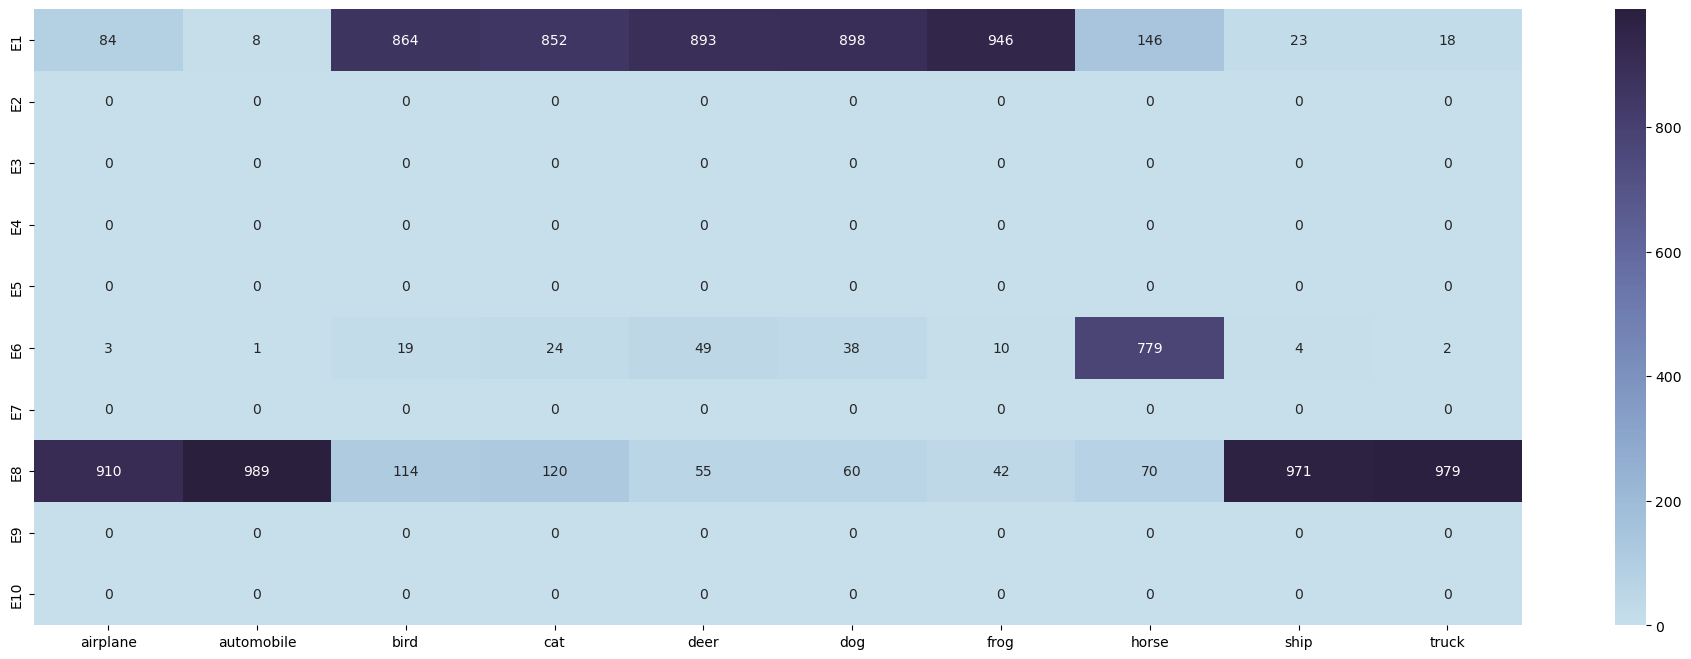


Experts used by the gate for classification of each class


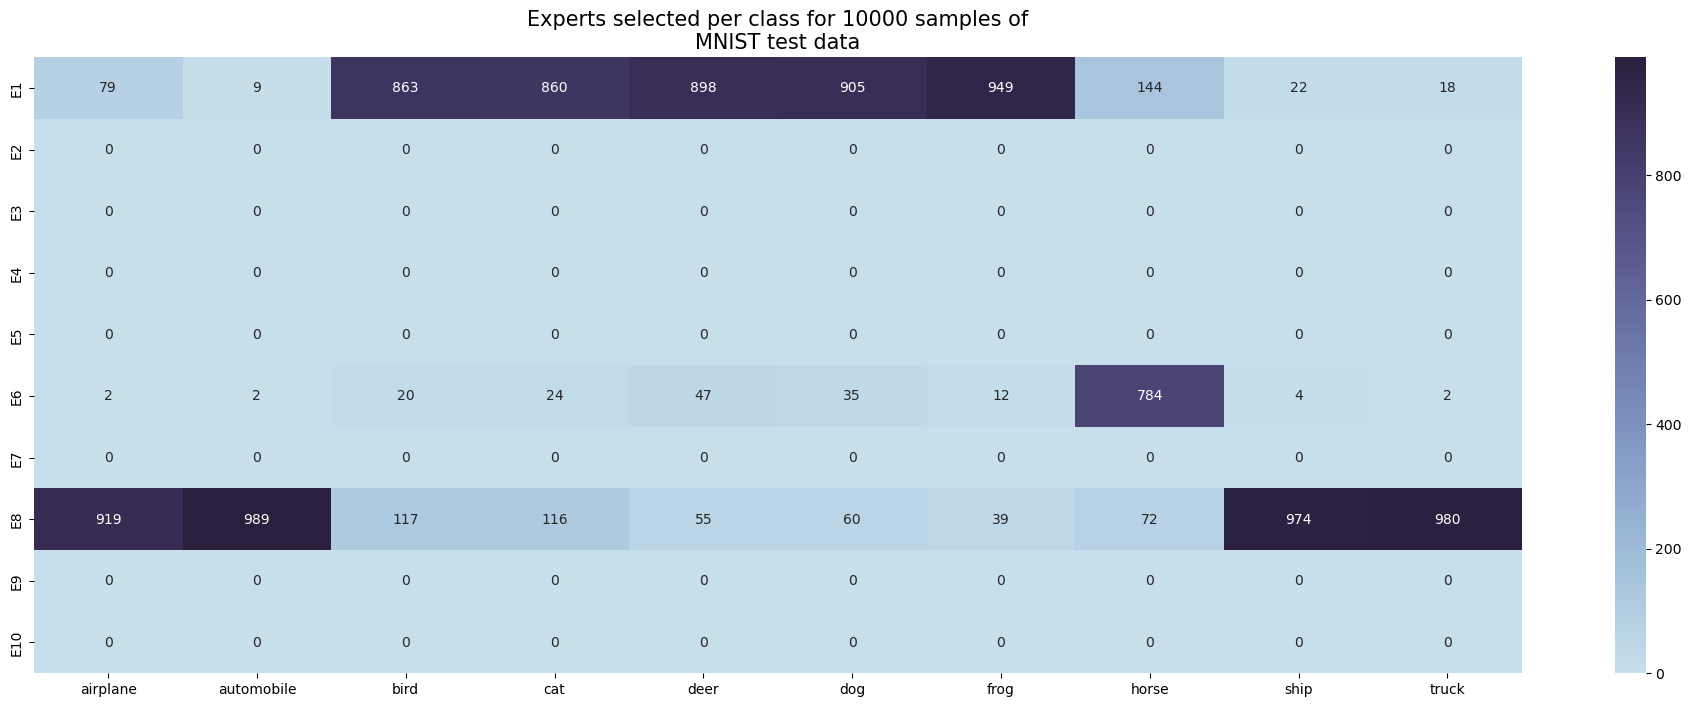

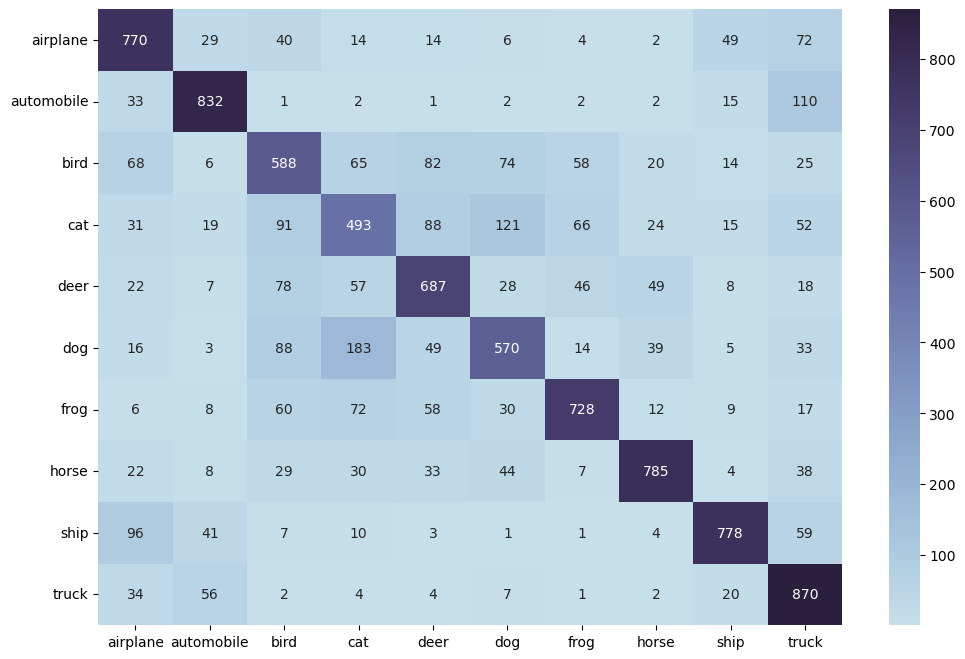

In [36]:
m = 'cifar10_without_reg_conv_4'
total_experts = 10
num_classes = 10
classes = classes_cifar10
num_epochs = 200

w_importance_range = [0.0]                           

test_loader = cifar10_testloader

plot_expert_usage(m, test_loader, w_importance_range=w_importance_range,
                  total_experts=total_experts,num_classes=num_classes,
                 classes=classes, num_epochs=num_epochs, fig_path=fig_path, model_path=model_path, device=device)

cifar10_without_reg_conv_4_top_2_10_10_models.pt
Min Training Error 0.187
Mutual Information 1.851
Sample Entropy 0.259
Expert Usage 1.882
cifar10_without_reg_conv_4_top_2_10_10_models.pt


<Figure size 640x480 with 0 Axes>

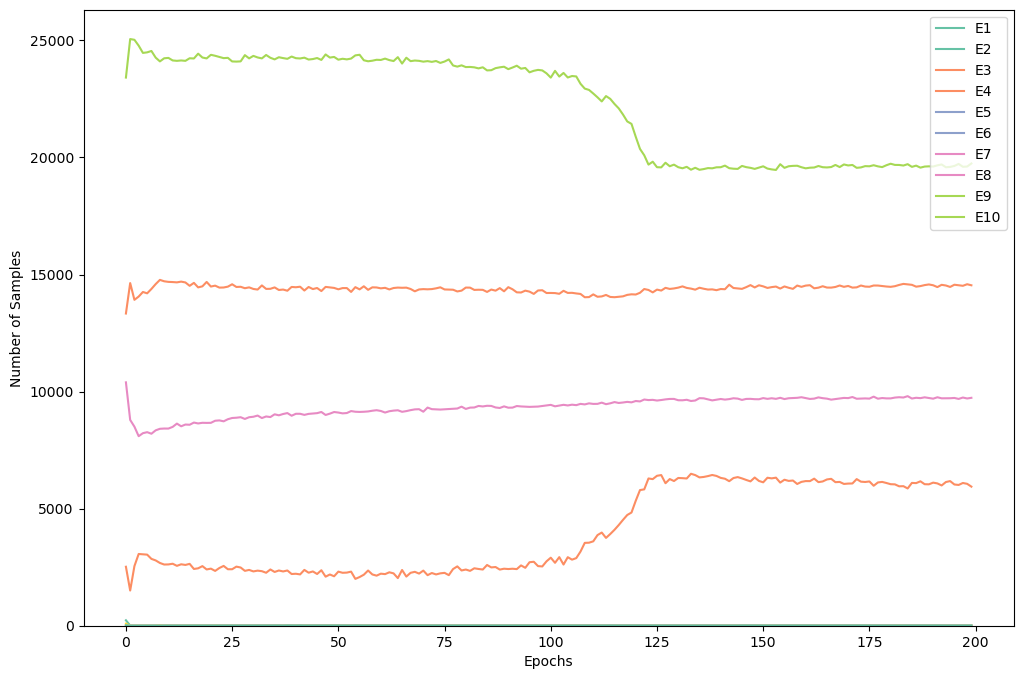

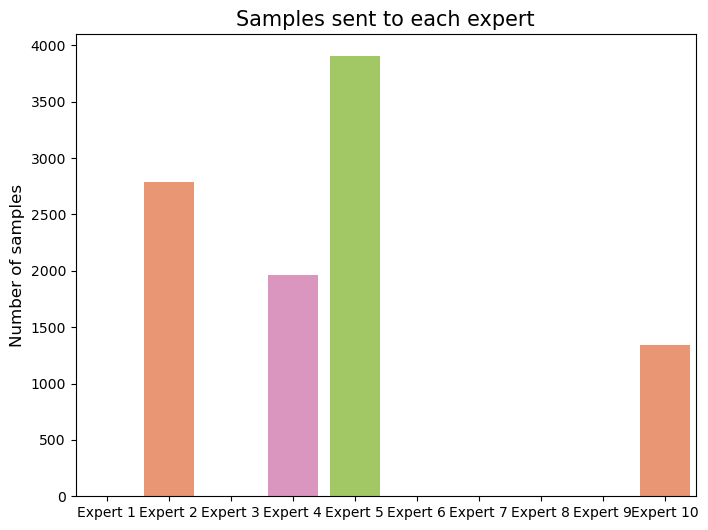

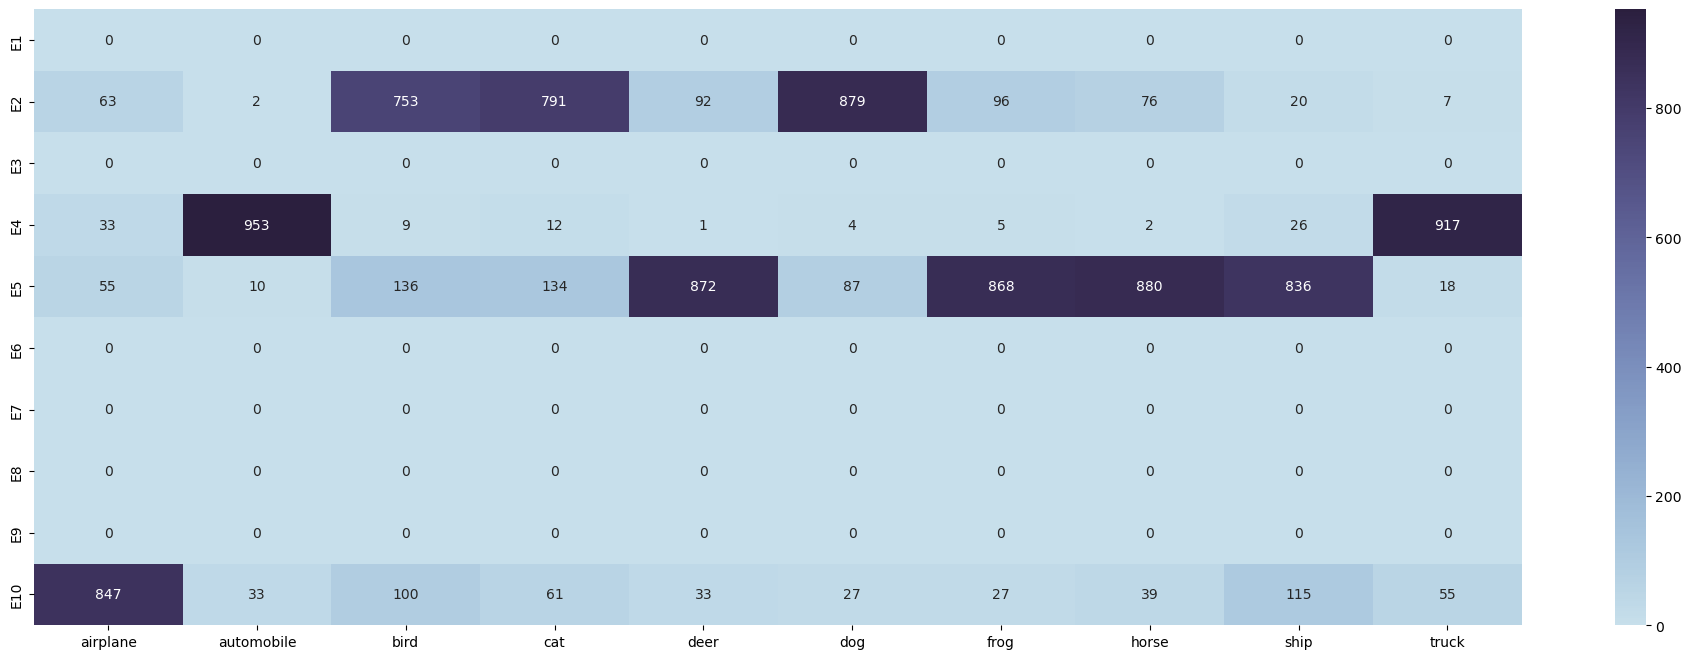


Experts used by the gate for classification of each class


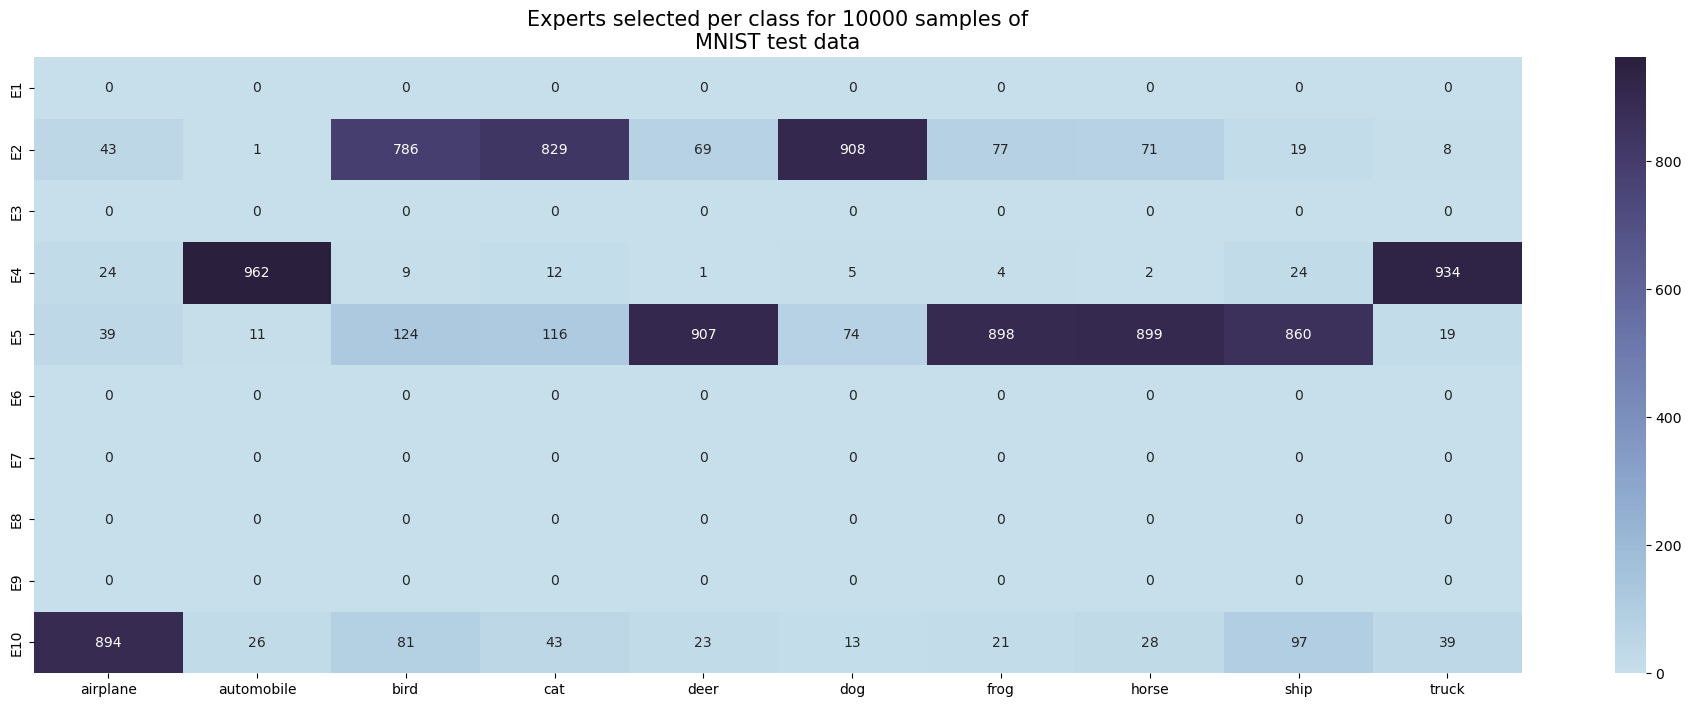

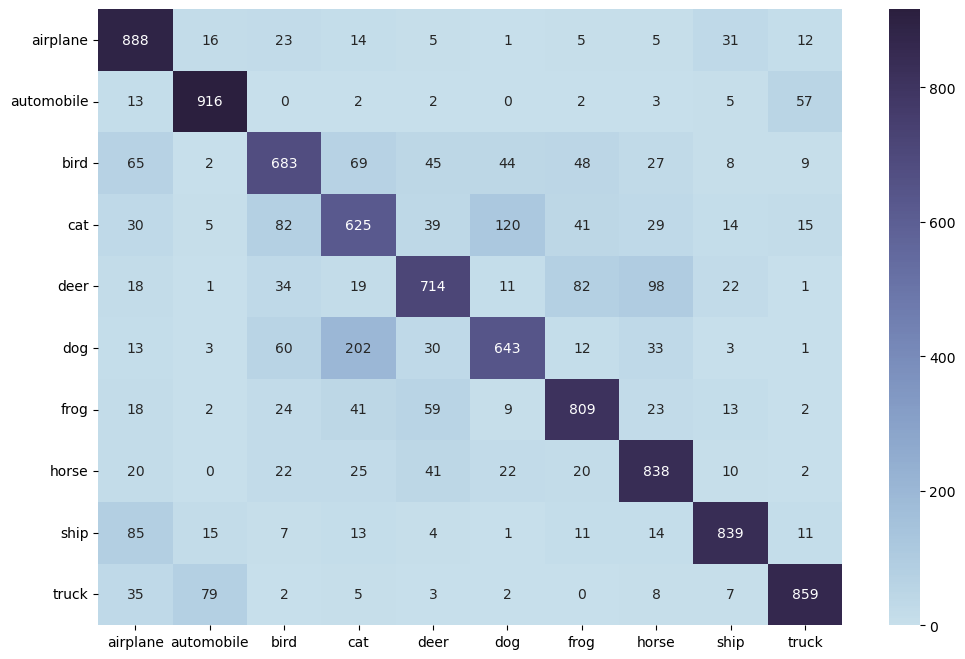

In [37]:
m = 'cifar10_without_reg_conv_4_top_2'
total_experts = 10
num_classes = 10
classes = classes_cifar10
num_epochs = 200

w_importance_range = [0.0]                           

test_loader = cifar10_testloader

plot_expert_usage(m, test_loader, w_importance_range=w_importance_range,
                  total_experts=total_experts,num_classes=num_classes,
                 classes=classes, num_epochs=num_epochs, fig_path=fig_path, model_path=model_path, device=device)

cifar10_without_reg_loss_gate_conv_2_10_10_models.pt
Min Training Error 0.139
Mutual Information 0.577
Sample Entropy -1.920
Expert Usage 0.000
cifar10_without_reg_loss_gate_conv_2_10_10_models.pt


<Figure size 640x480 with 0 Axes>

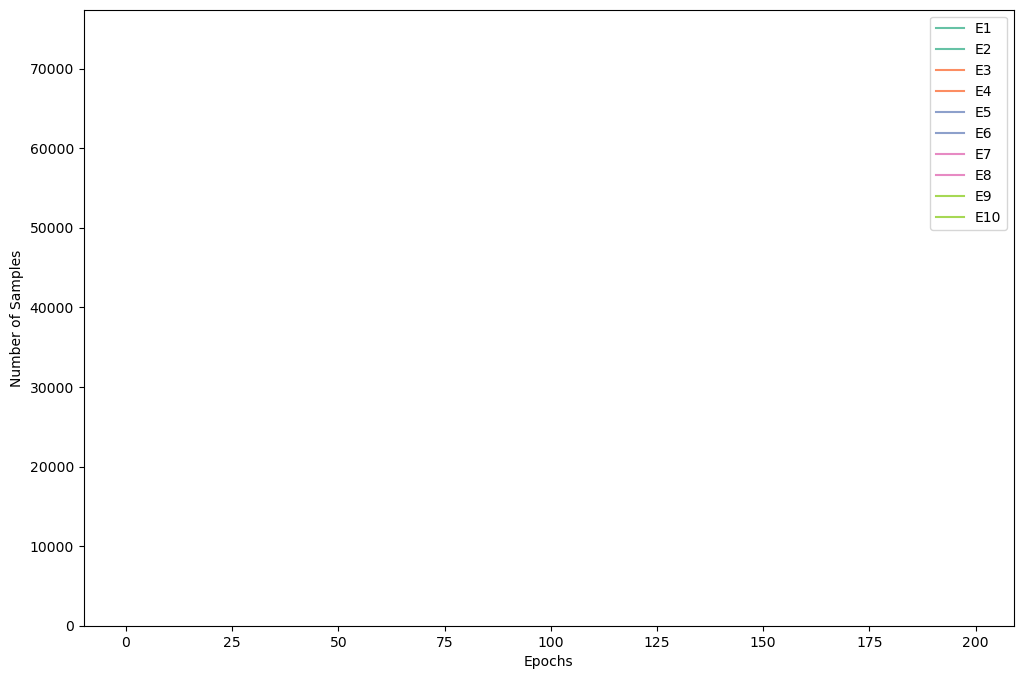

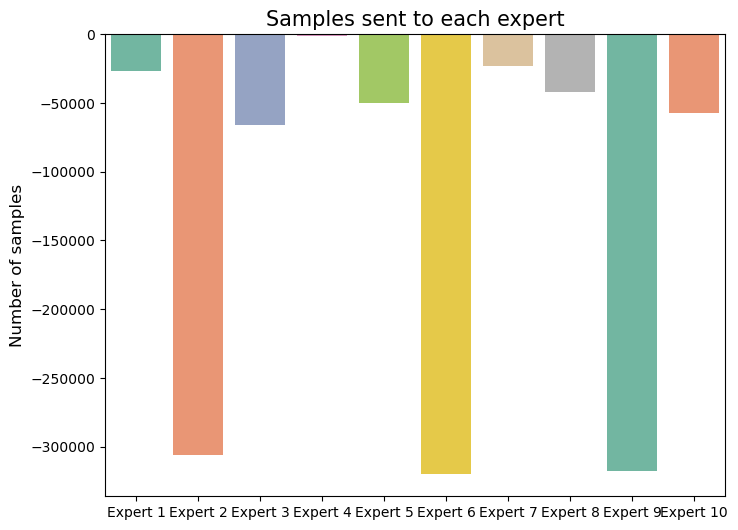

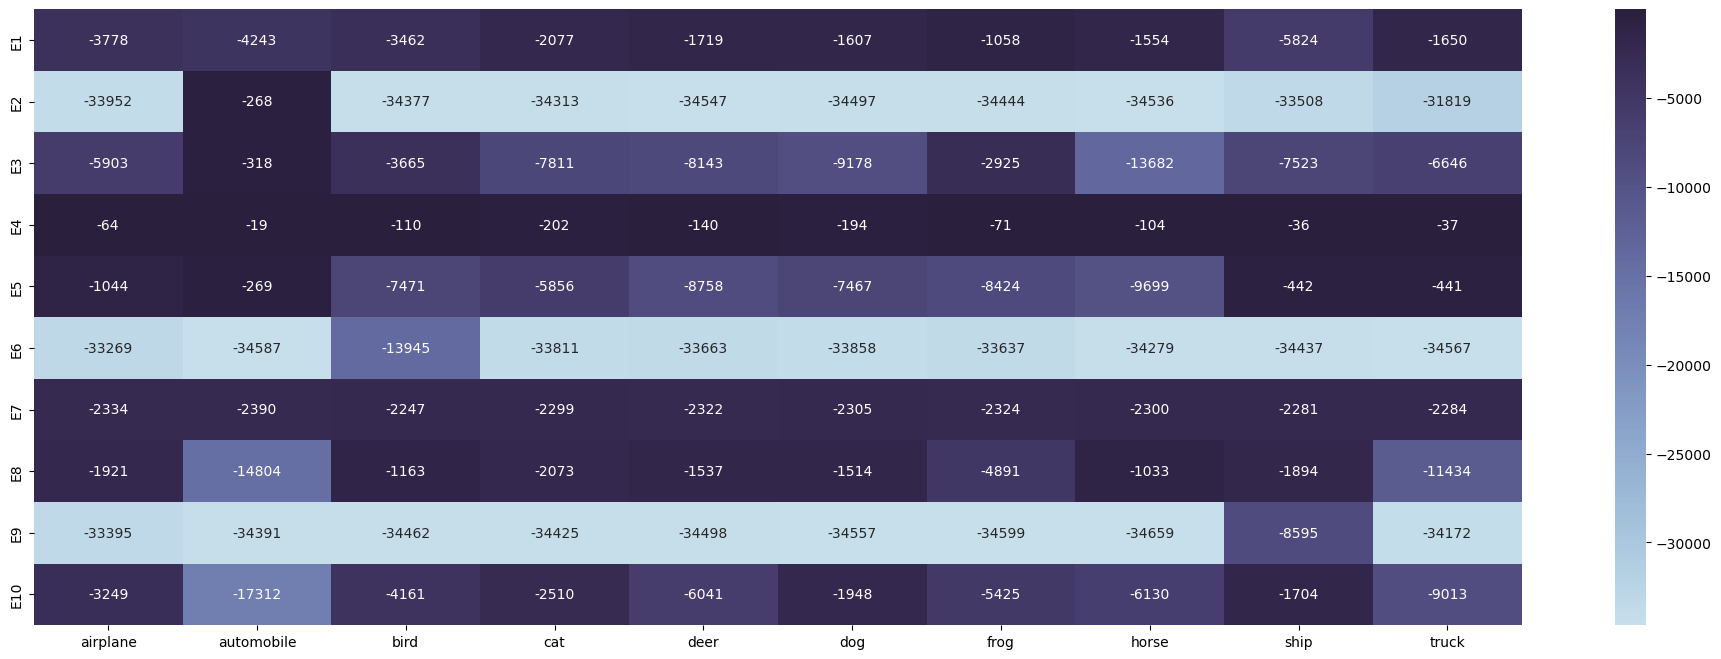


Experts used by the gate for classification of each class


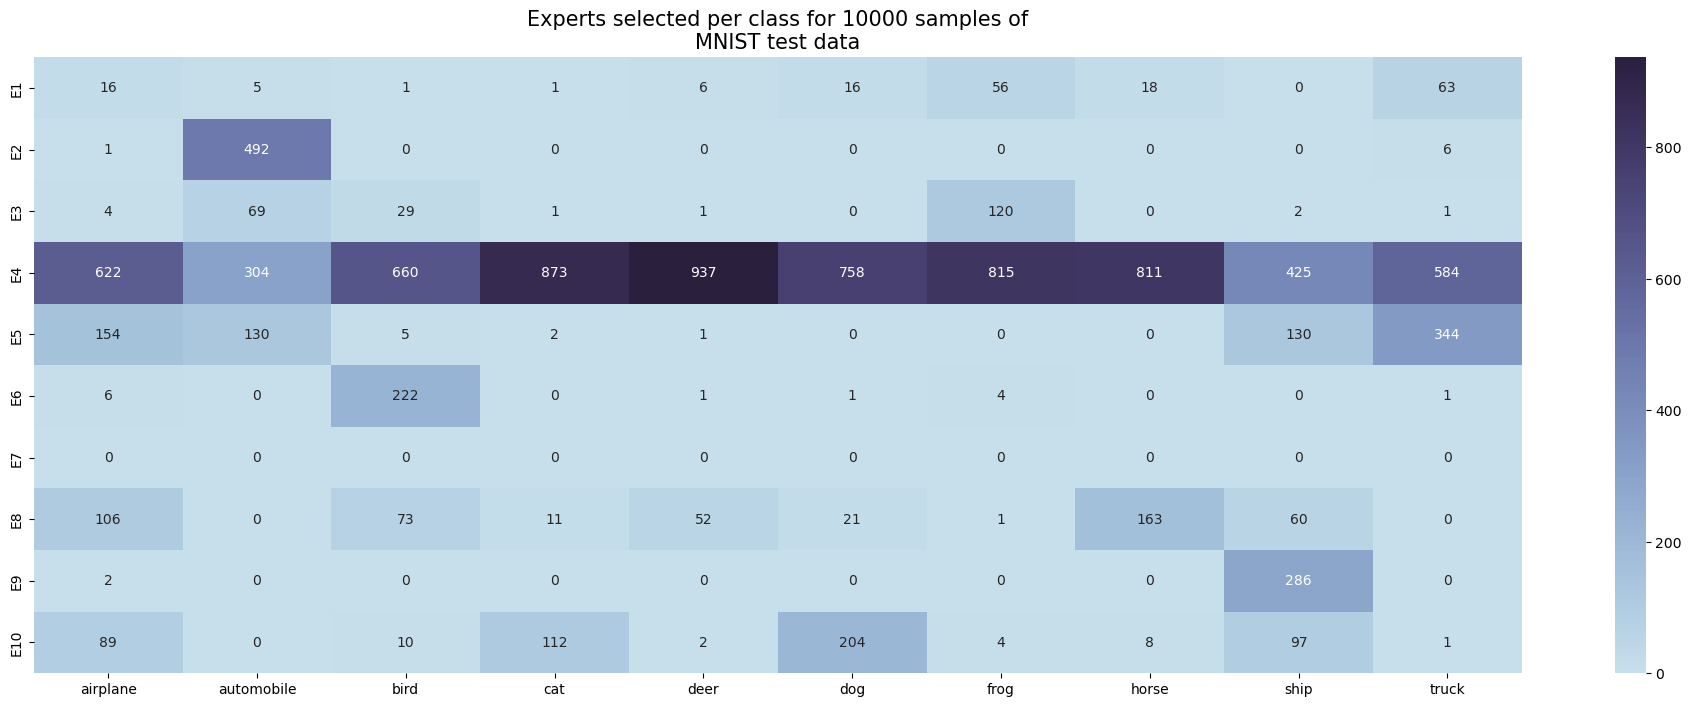

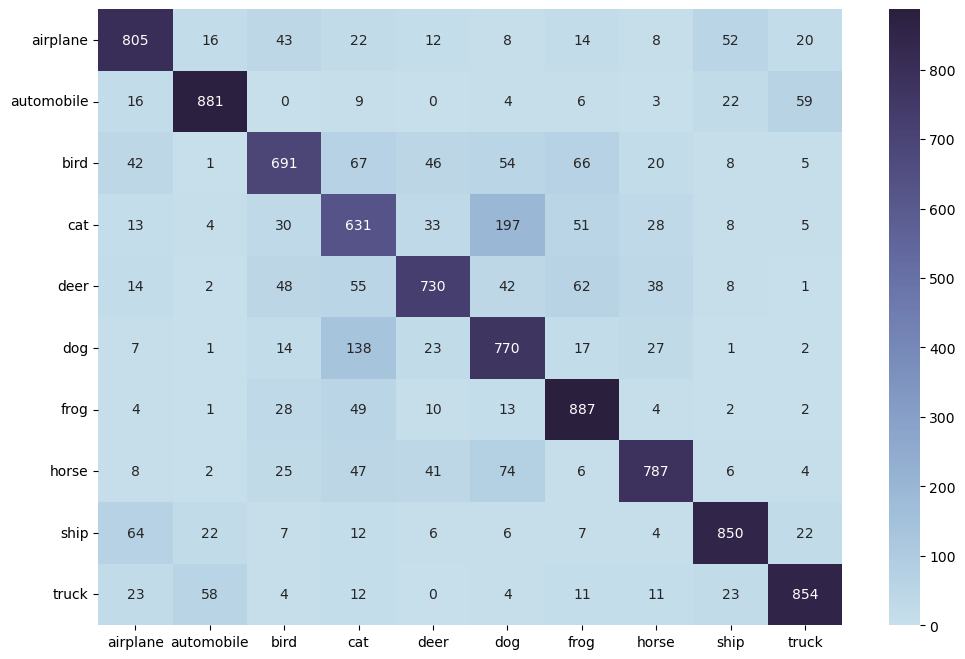

In [46]:
m = 'cifar10_without_reg_loss_gate_conv_2'
total_experts = 10
num_classes = 10
classes = classes_cifar10
num_epochs = 200

w_importance_range = [0.0]                           

test_loader = cifar10_testloader

plot_expert_usage(m, test_loader, w_importance_range=w_importance_range,
                  total_experts=total_experts,num_classes=num_classes,
                 classes=classes, num_epochs=num_epochs, fig_path=fig_path, model_path=model_path, device=device)

cifar10_without_reg_loss_gate_conv_4_10_10_models.pt
Min Training Error 0.061
Mutual Information 2.625
Sample Entropy 0.140
Expert Usage 0.000
cifar10_without_reg_loss_gate_conv_4_10_10_models.pt


<Figure size 640x480 with 0 Axes>

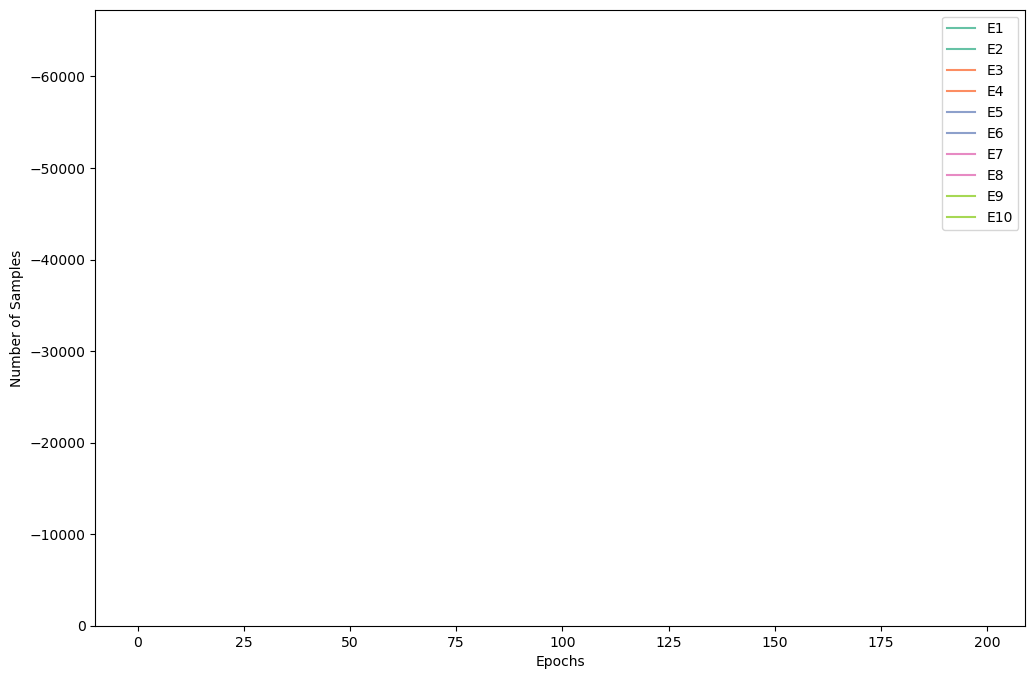

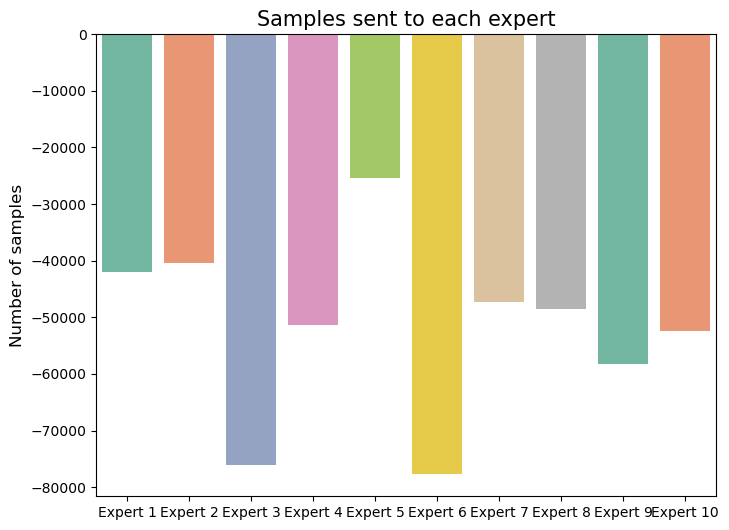

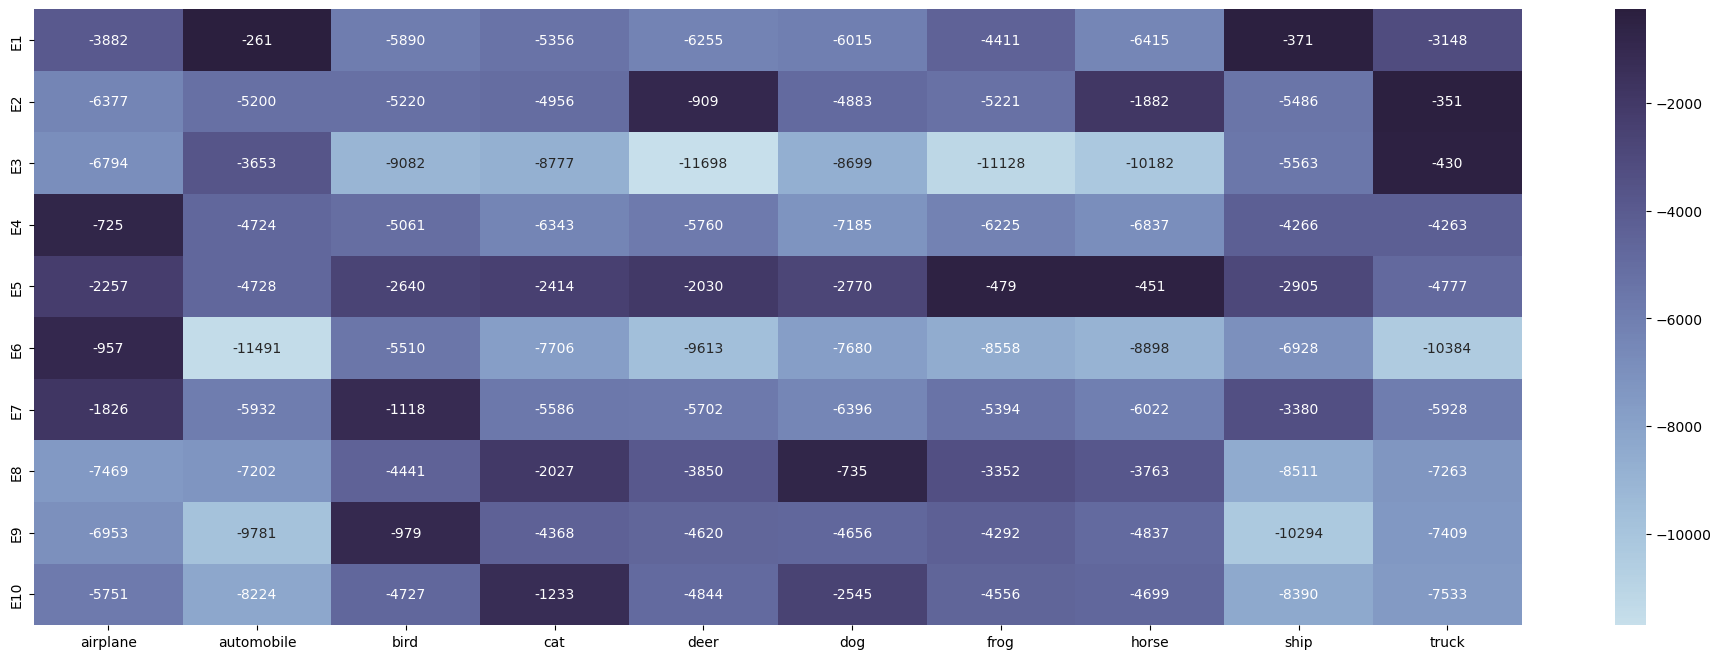


Experts used by the gate for classification of each class


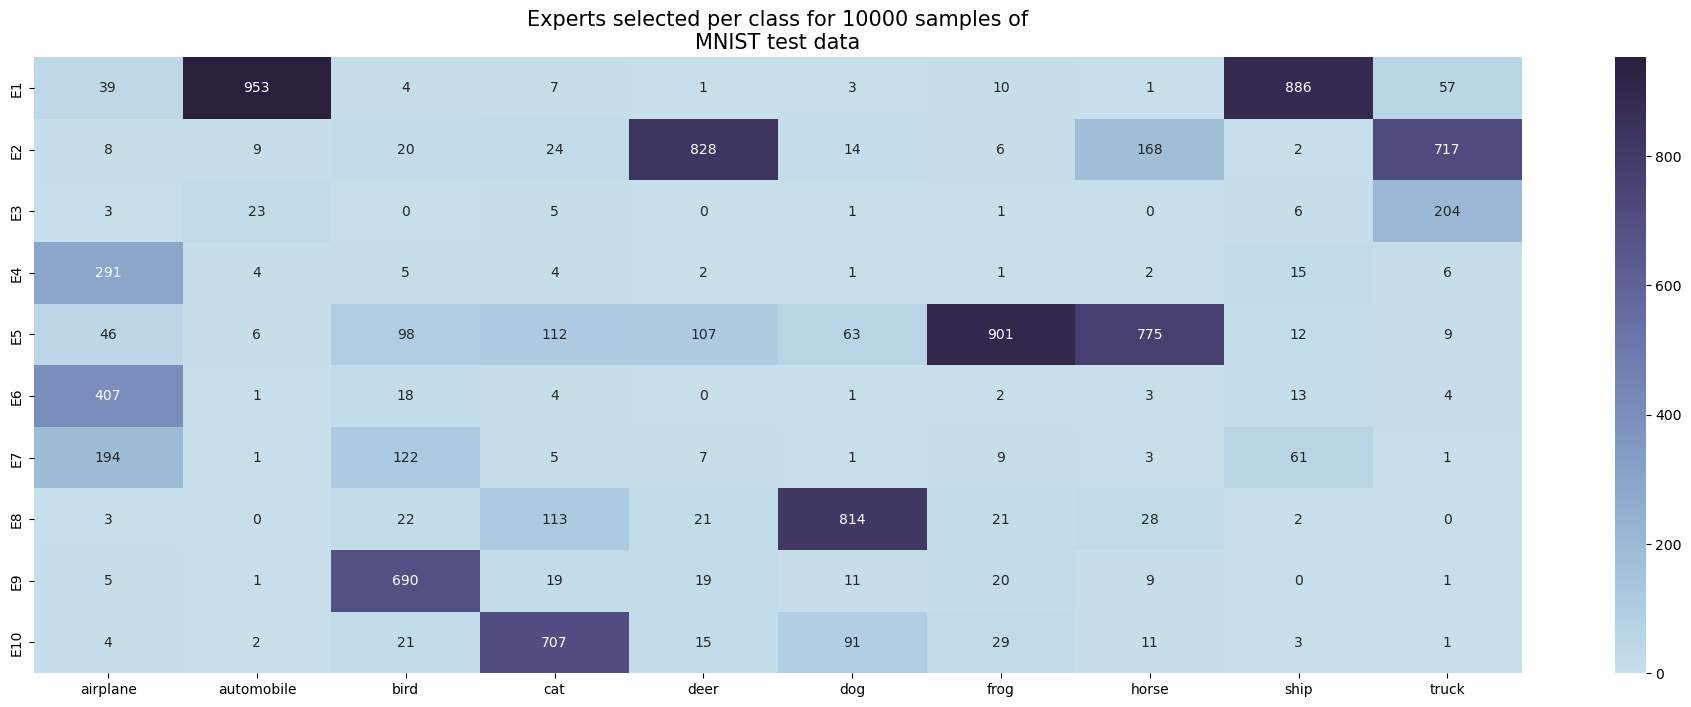

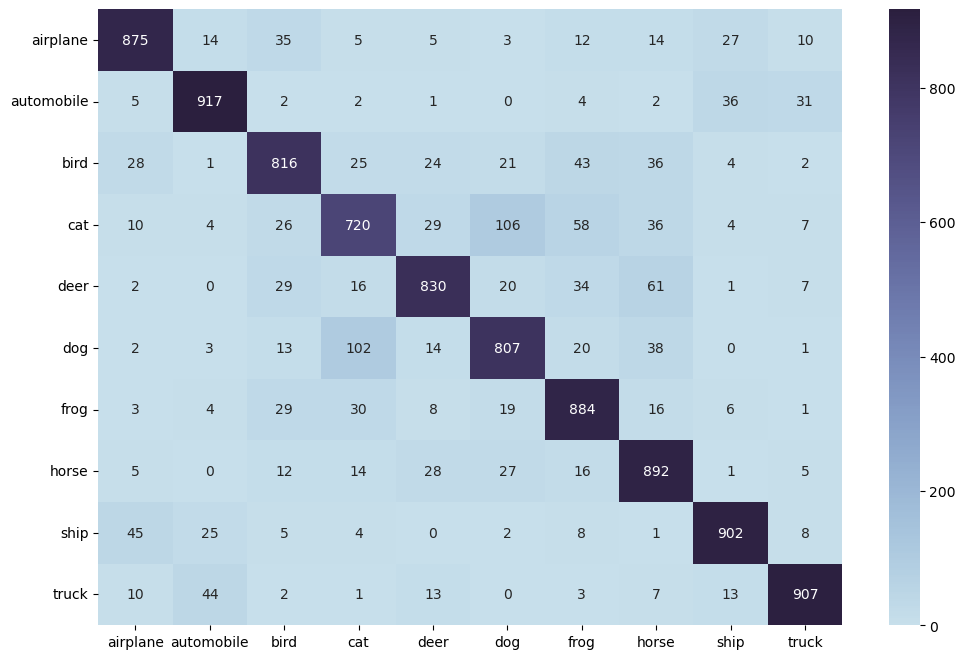

In [45]:
m = 'cifar10_without_reg_loss_gate_conv_4'
total_experts = 10
num_classes = 10
classes = classes_cifar10
num_epochs = 200

w_importance_range = [0.0]                           

test_loader = cifar10_testloader

plot_expert_usage(m, test_loader, w_importance_range=w_importance_range,
                  total_experts=total_experts,num_classes=num_classes,
                 classes=classes, num_epochs=num_epochs, fig_path=fig_path, model_path=model_path, device=device)

cifar10_with_attn_conv_2_top_2_10_10_models.pt
Min Training Error 0.117
Mutual Information 0.000
Sample Entropy 0.000
Expert Usage 0.000
cifar10_with_attn_conv_2_top_2_10_10_models.pt


<Figure size 640x480 with 0 Axes>

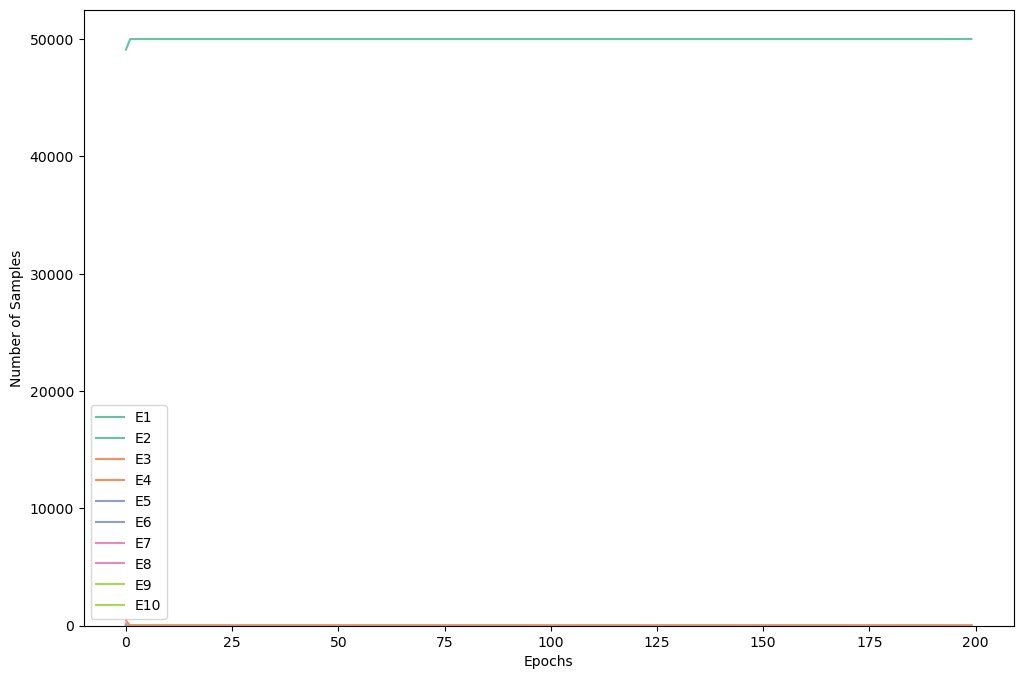

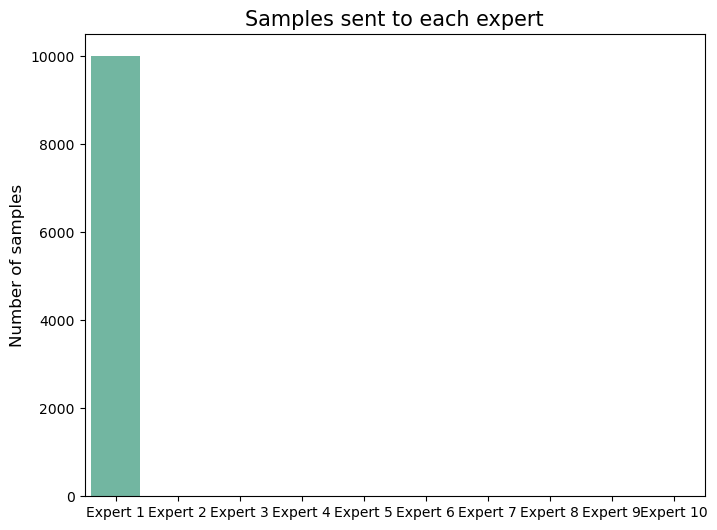

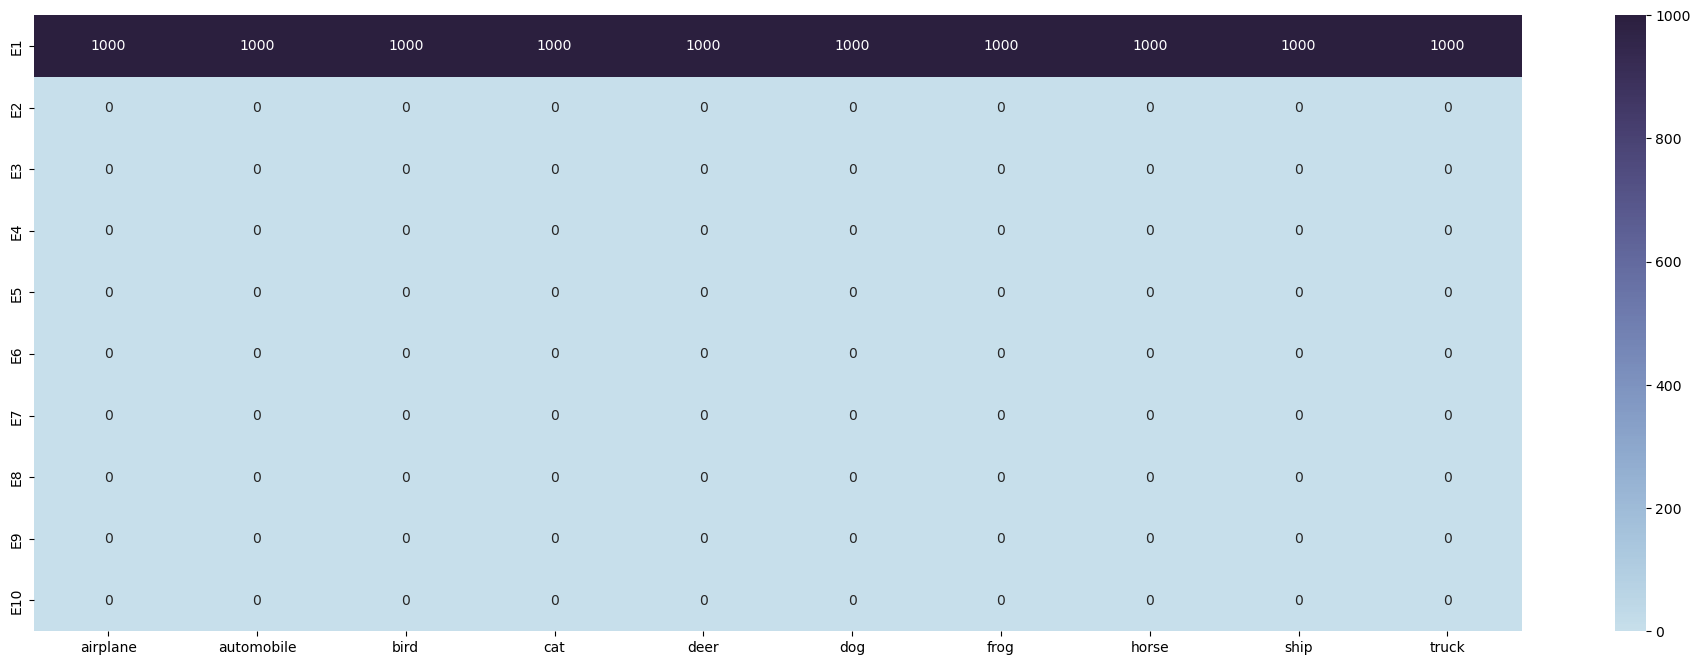


Experts used by the gate for classification of each class


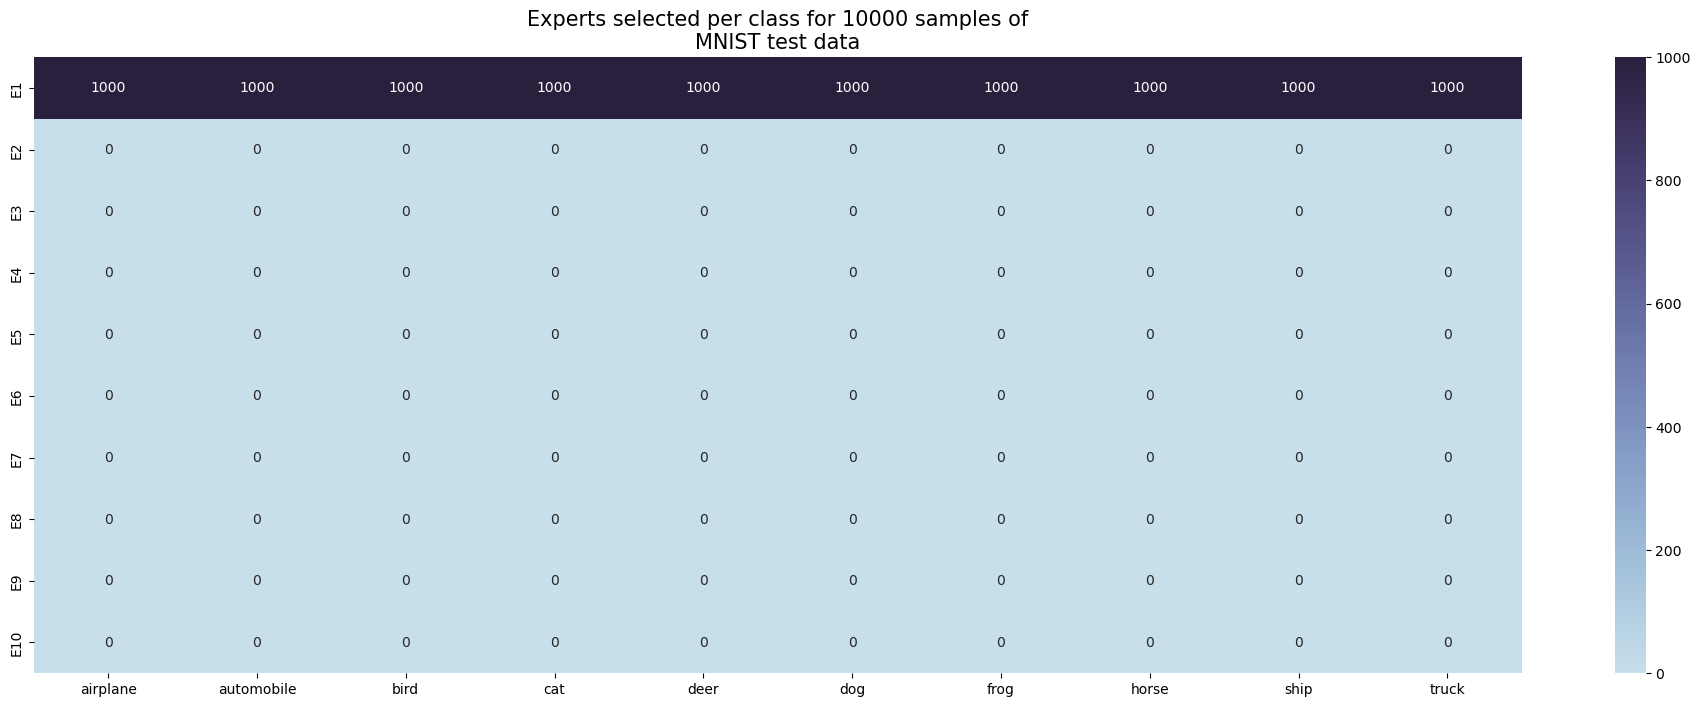

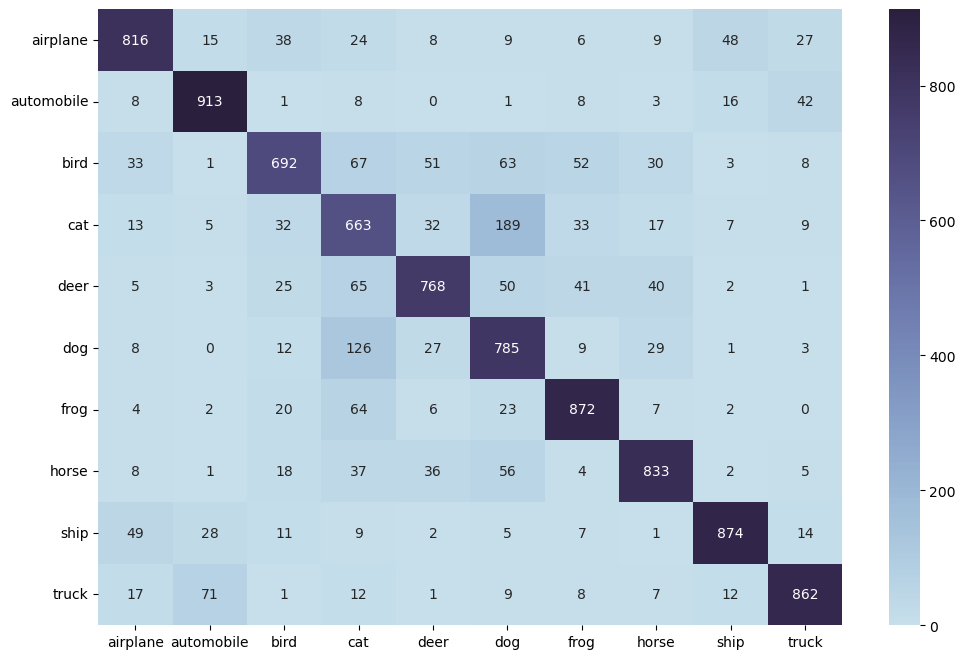

In [35]:
m = 'cifar10_with_attn_conv_2_top_2'
total_experts = 10
num_classes = 10
classes = classes_cifar10
num_epochs = 200

w_importance_range = [0.0]                           

test_loader = cifar10_testloader

plot_expert_usage(m, test_loader, w_importance_range=w_importance_range,
                  total_experts=total_experts,num_classes=num_classes,
                 classes=classes, num_epochs=num_epochs, fig_path=fig_path, model_path=model_path, device=device)

cifar10_with_attn_conv_4_top_2_10_10_models.pt
Min Training Error 0.023
Mutual Information 3.227
Sample Entropy 0.088
Expert Usage 3.321
cifar10_with_attn_conv_4_top_2_10_10_models.pt


<Figure size 640x480 with 0 Axes>

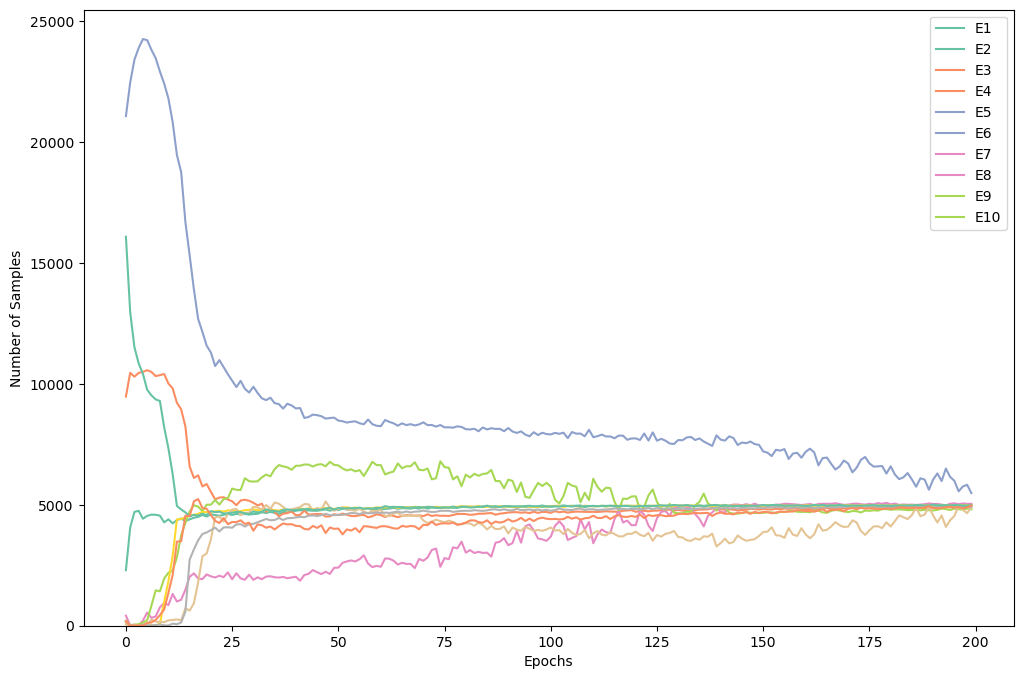

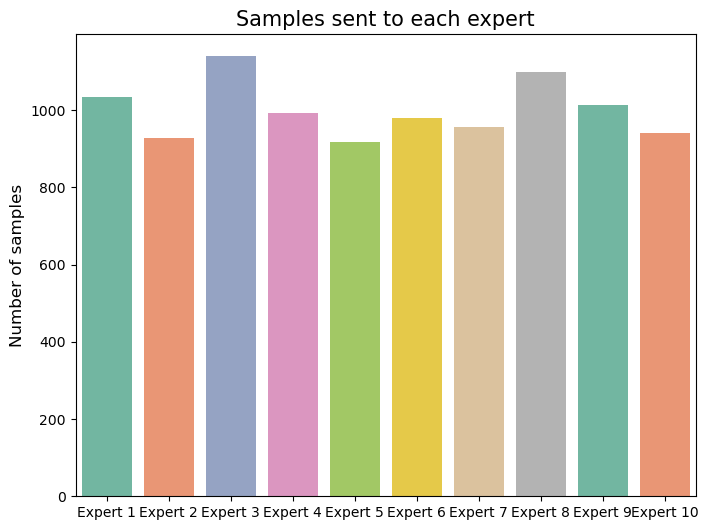

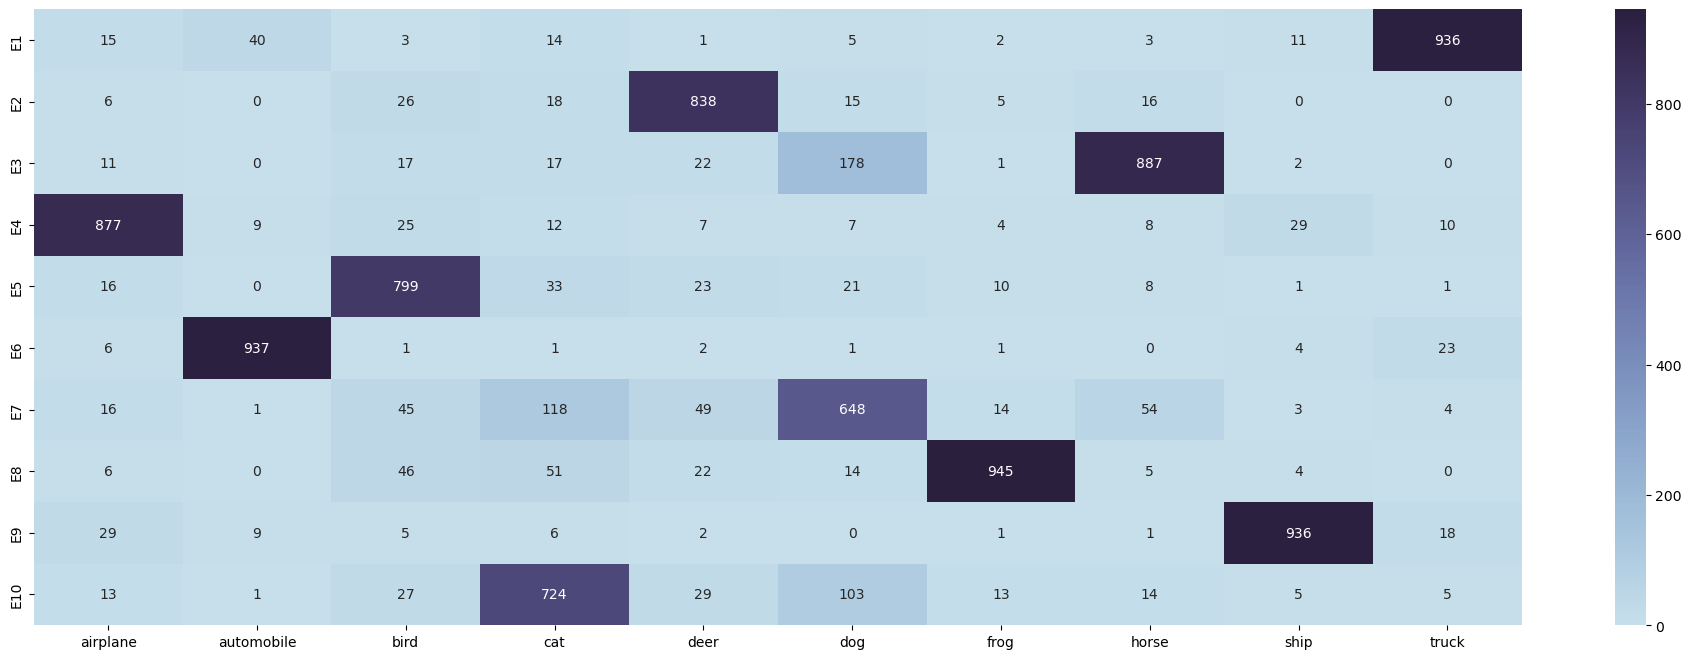


Experts used by the gate for classification of each class


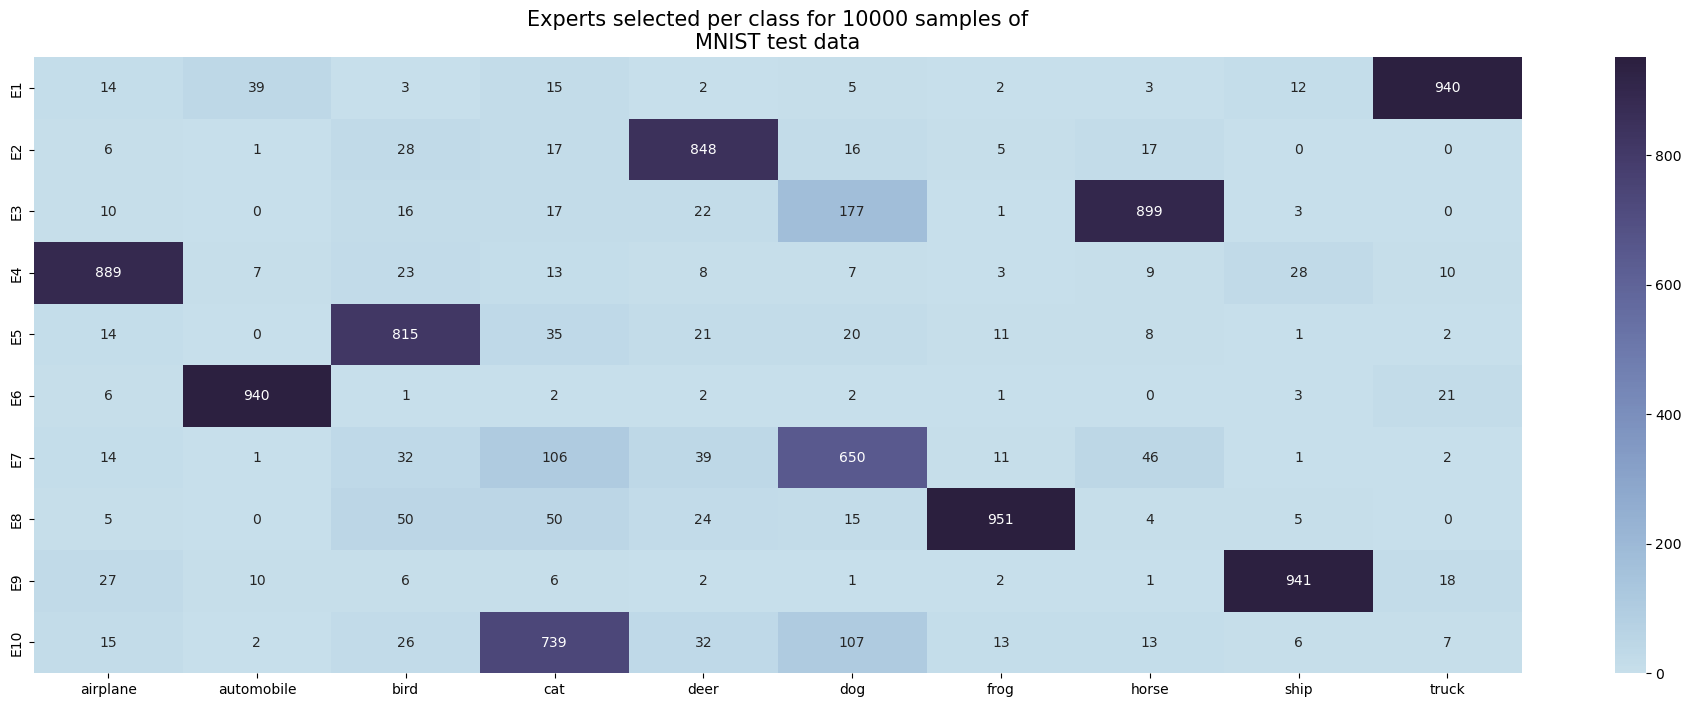

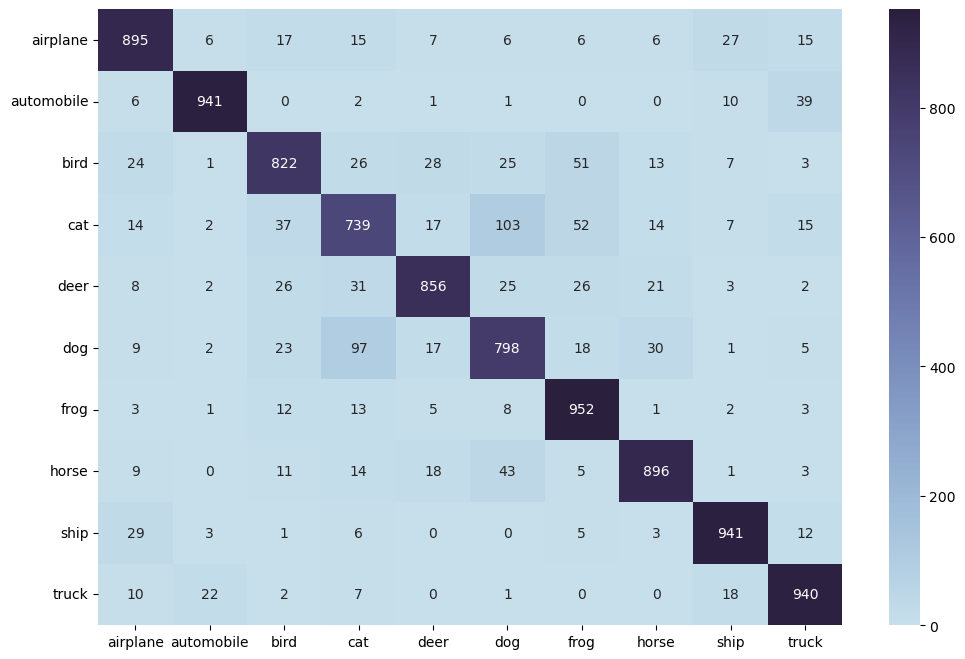

In [34]:
m = 'cifar10_with_attn_conv_4_top_2'
total_experts = 10
num_classes = 10
classes = classes_cifar10
num_epochs = 200

w_importance_range = [0.0]                           

test_loader = cifar10_testloader

plot_expert_usage(m, test_loader, w_importance_range=w_importance_range,
                  total_experts=total_experts,num_classes=num_classes,
                 classes=classes, num_epochs=num_epochs, fig_path=fig_path, model_path=model_path, device=device)